 # **Predictive Analytics Model:**

# **Loan default prediction model**

**Context**
Home loans contribute significantly to retail bank profits, but fraudulent applications—through identity theft, falsified documents, or financial misrepresentation—pose serious risks. Traditional manual verification methods are error-prone, while heuristic-based automation lacks adaptability. Machine learning offers a more effective fraud detection approach, ensuring accuracy and fairness without inheriting human biases.

**Problem Statement**
A bank’s credit department aims to enhance fraud detection in home loan approvals using machine learning. The model must be statistically sound, unbiased, and interpretable to justify flagged applications while adhering to regulatory guidelines.

**Objective**
Develop a classification model to identify fraudulent loan applications and recommend key features for banks to monitor, reducing financial risk while ensuring fair and efficient loan approvals.

## **Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, f1_score

from sklearn import metrics

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier


import scipy.stats as stats

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the dataset**


In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

In [4]:
# Displaying first five rows
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

## Target Variable

**BAD**  
- `1` = Applicant defaulted or was severely delinquent  
- `0` = Loan was repaid

## Input Variables (12 total)

- **LOAN:** Amount of loan approved  
- **MORTDUE:** Amount due on the existing mortgage  
- **VALUE:** Current value of the property  
- **REASON:** Purpose of loan (`HomeImp` = home improvement, `DebtCon` = debt consolidation)  
- **JOB:** Type of job (e.g., Manager, Self-employed)  
- **YOJ:** Years at current job  
- **DEROG:** Number of major derogatory credit reports  
- **DELINQ:** Number of delinquent credit lines (30–60 days past due)  
- **CLAGE:** Age of oldest credit line (in months)  
- **NINQ:** Number of recent credit inquiries  
- **CLNO:** Total number of existing credit lines  
- **DEBTINC:** Debt-to-income ratio (monthly debt ÷ gross monthly income)


In [5]:
# Displaying last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

In [6]:
# Checking the shape of the data
data.shape

(5960, 13)

**Insights**

- There are 5960 rows each one them with 13 columns
- There are rows with missing values (Nan).

In [7]:
# Checking info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**

- 11 of 13 columns have missing values.
- Only 2 columns are object: Reason and Job.

In [8]:
# Analyzing missing values
(data.isnull().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
# Checking the percentage of missing values in the each column.
(data.isnull().sum()/data.shape[0] * 100)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights**

- 5 columns (Value, Reason, Job, Clage, CLNO) have around 5% of missing values.
- 4 columns (Mortdue, Yog, Delinq, Ninq) have around 10% of missing values.
- 1 column (Debtinc) has more than 20% of missing values.
- In total, 10 of 13 columns have missing values.

### **Convert the data types**

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is a classification problem and the target variable is categorical

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category.

for i in cols:
    data[i] = data[i].astype("category")

In [13]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [14]:
# Analyzing the summary statistics for numerical variables

num_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data[num_cols].describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insights**

- All numerical variables have big outliers (max values) compared to their mean.
- The big outliers of the variables LOAN, MORTDUE and VALUE means there are a few persons who receive very big loans compared to the majority.
- The outlier of DELINQ means there are few peoples who frequently doesn't make their payments.
- The DEBTINC has weird values. A mean of ~34 is larger than 1 meaning the average customer owe almost 34 time his own total incomes, which isn't very logic. This variable is supposed to be a ratio.

In [15]:
# Checking summary for categorical data

data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights**

- BAD has only 2 values: the value 0 which means the client hasn't defaulted and has a frequency of 80%. This means the other 20% of clients have defaulted at least once.
- Around 69% (~2/3) of clients ask for loans to pay other liabilities and consumer debts.
- "Other" represents 42% of the client's jobs.

**Let's look at the unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize = True))
    print('*'*40)

Unique values in BAD are :
BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
****************************************
Unique values in REASON are :
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
****************************************
Unique values in JOB are :
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
****************************************


**Insights**

- 80% of client are non defaulted. 20% of them are defaulted.
- Around 69% ask for loans to pay other liabilities and consumer debts. ~30% ask for loans to make home improvements.
- There are six types of jobs: ~58% of those jobs are proffesional executives, Office employees, Managers, self employed, sales. The 42% is in Other job.

## **Exploratory Data Analysis (EDA) and Visualization**

### **1. Univariate Analysis - Numerical Data**


In [17]:
# Function to create a boxplot and histogram to study the central tendency of the data
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet', orient='h') # boxplot will be created and a star will indicate the mean value of the column, oriented horizontally
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

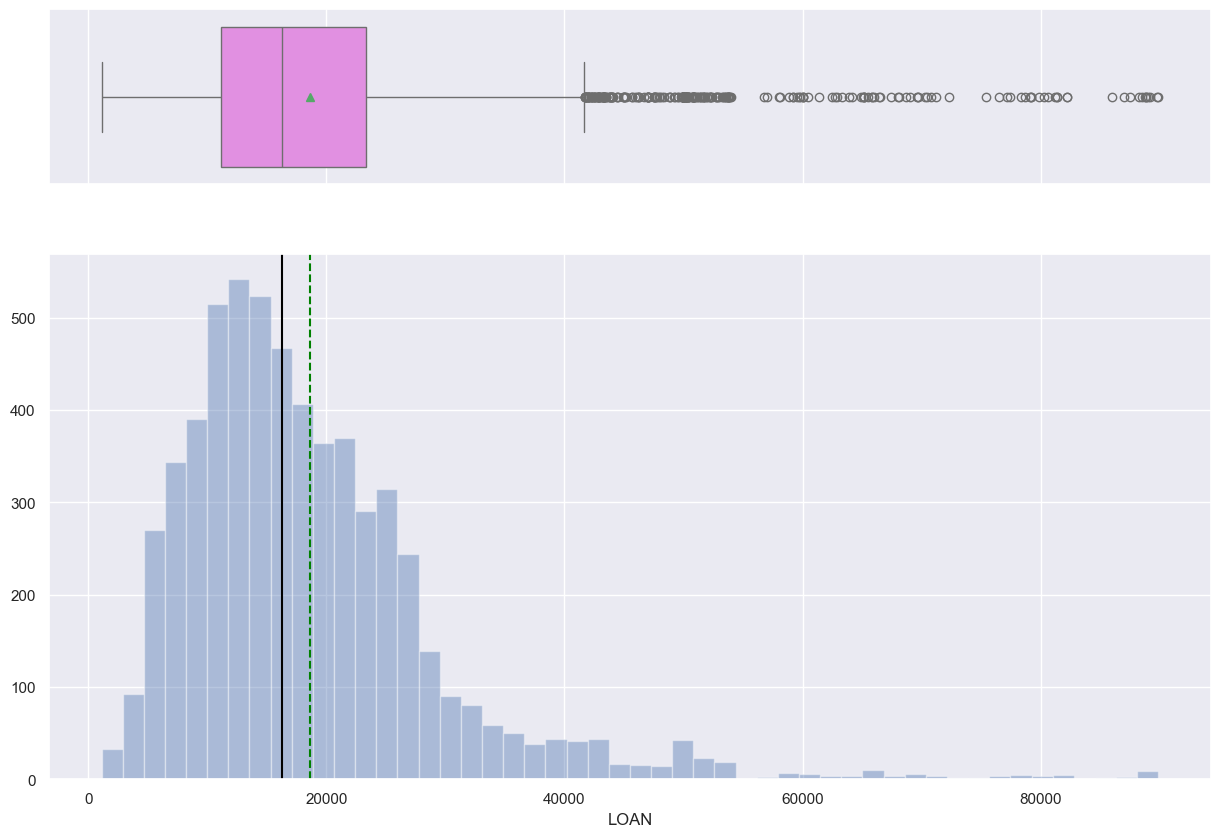

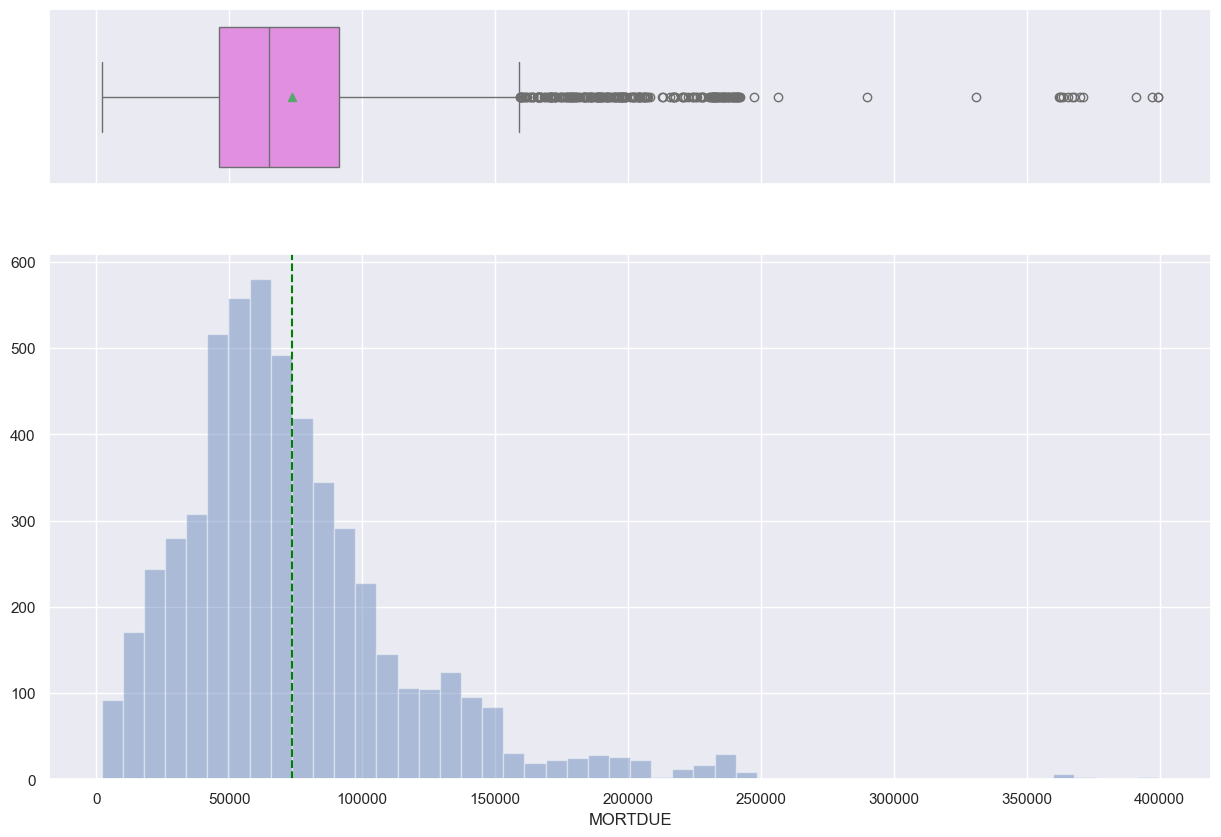

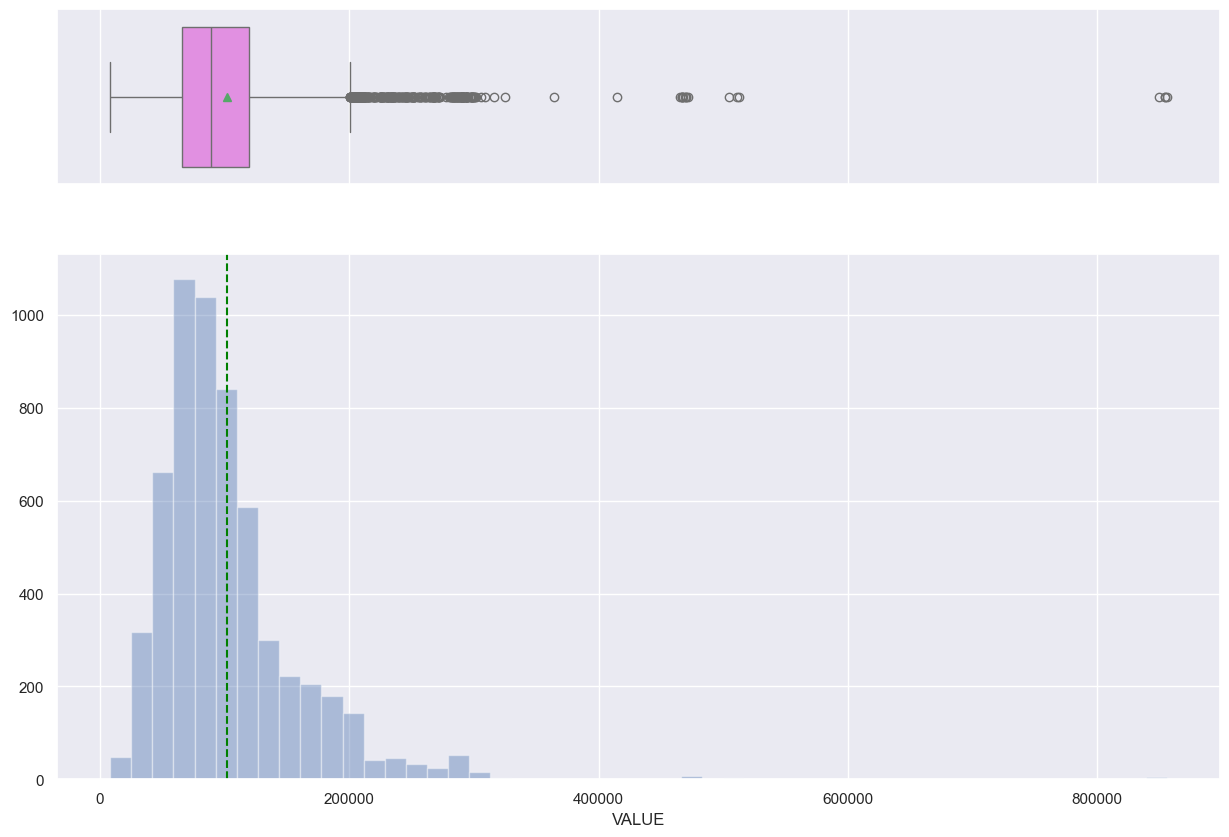

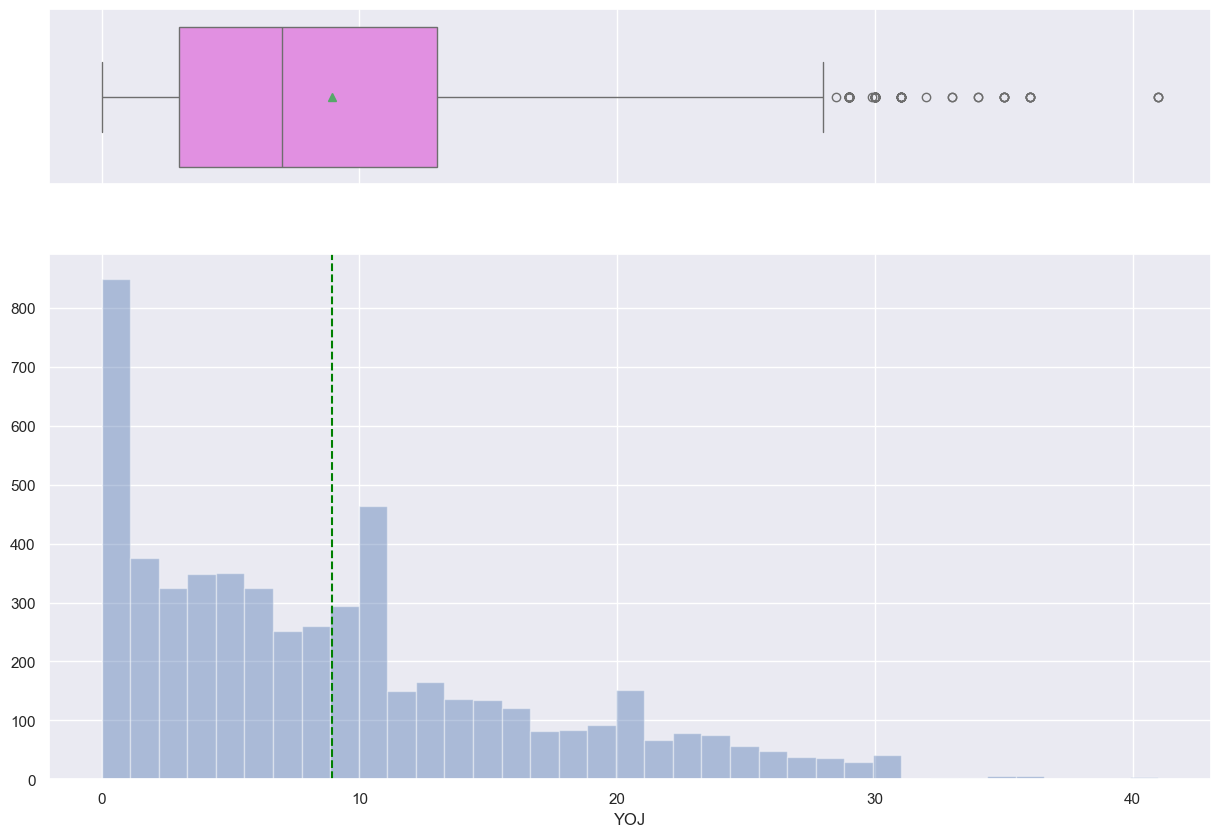

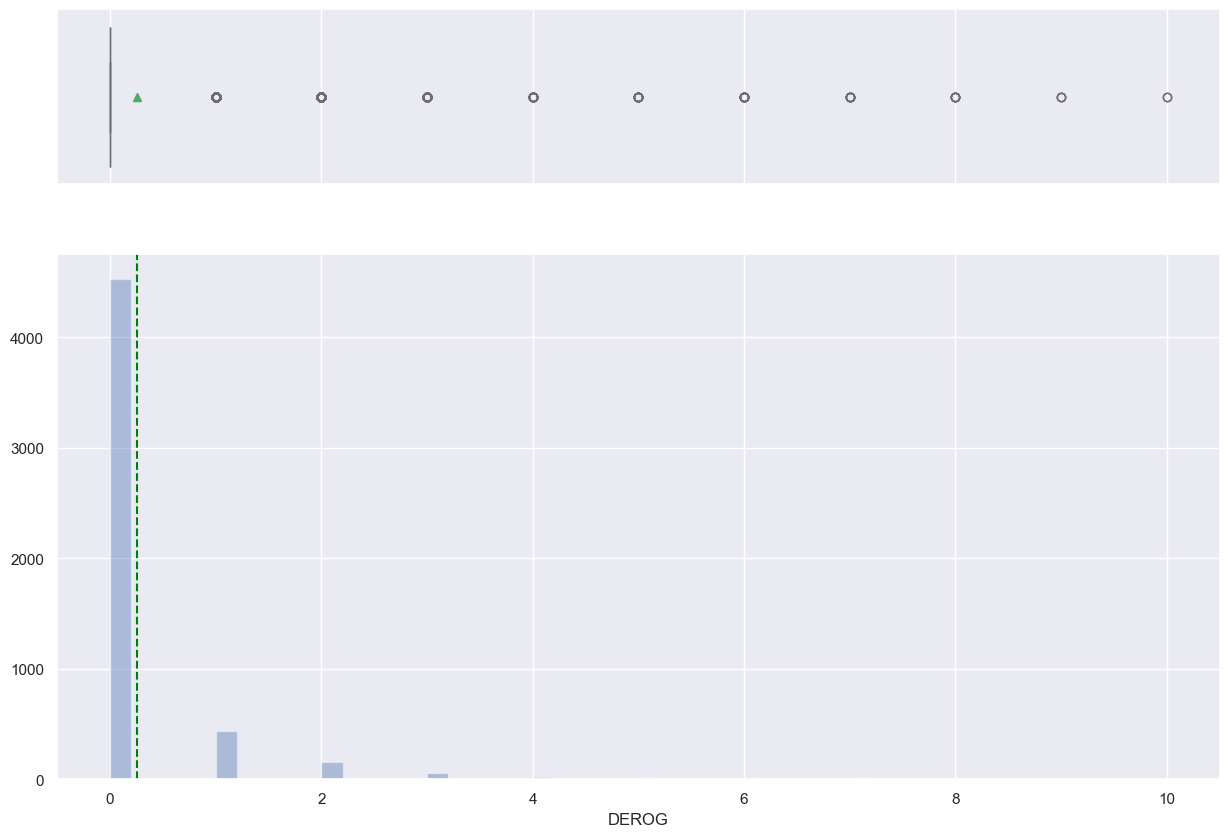

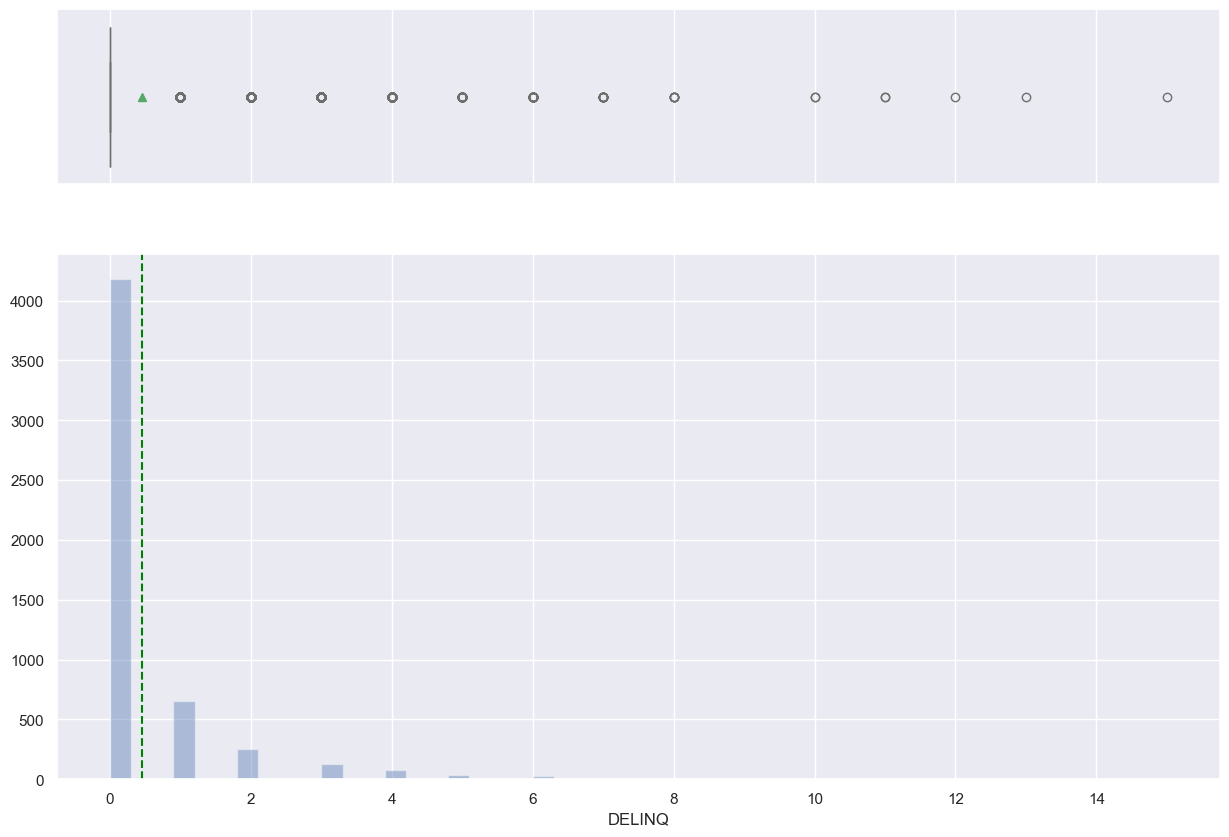

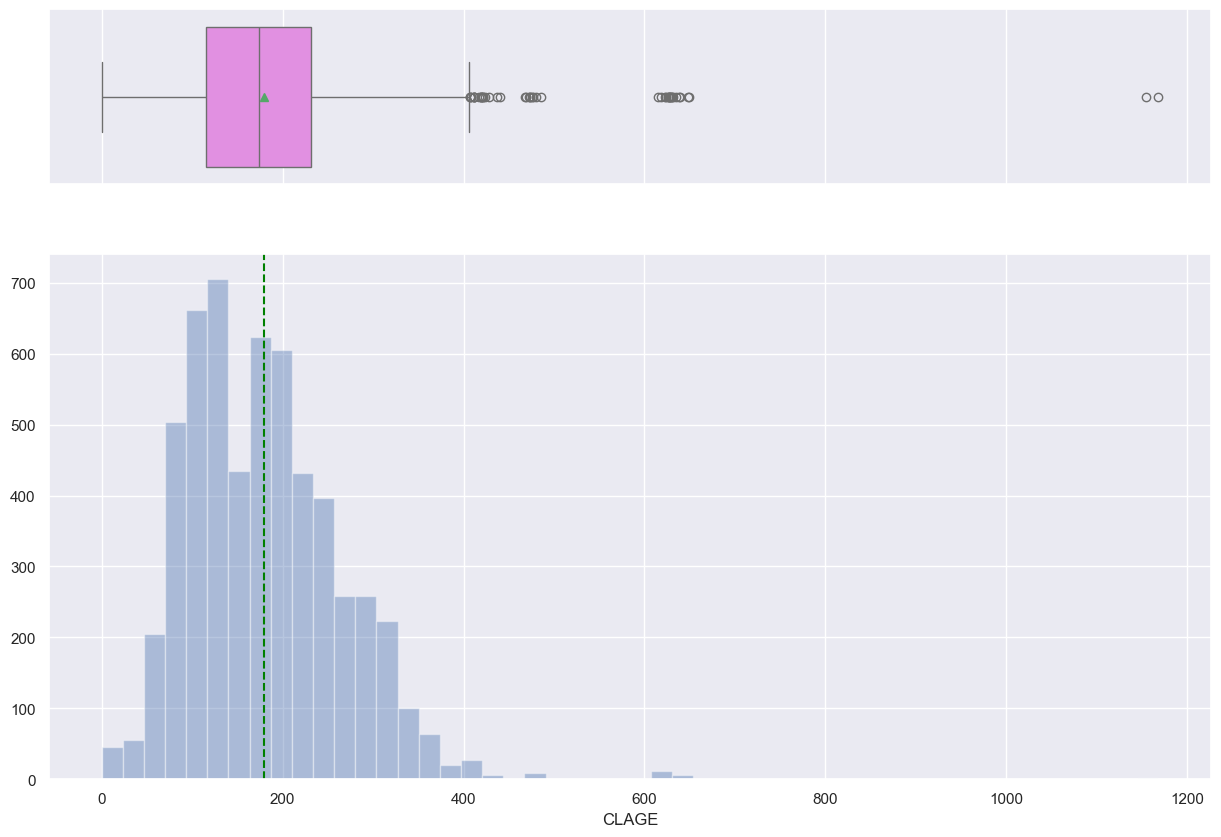

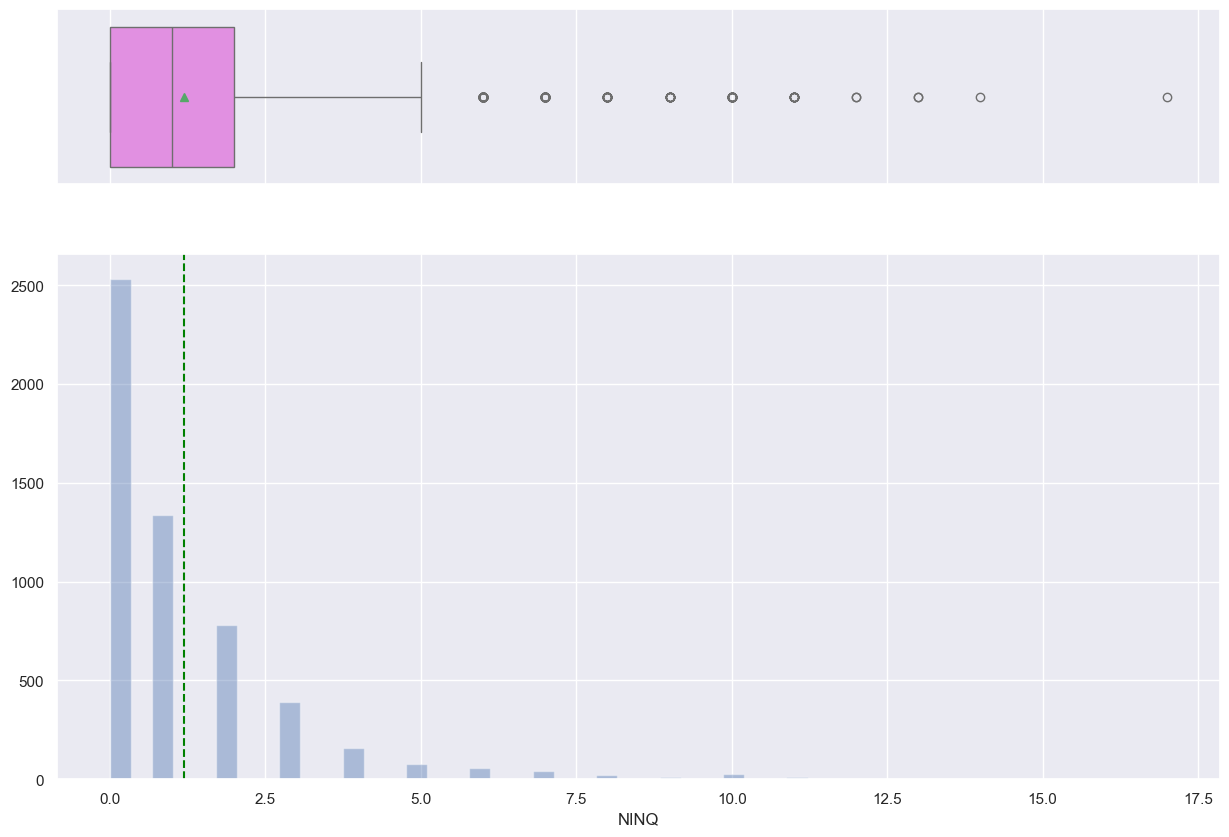

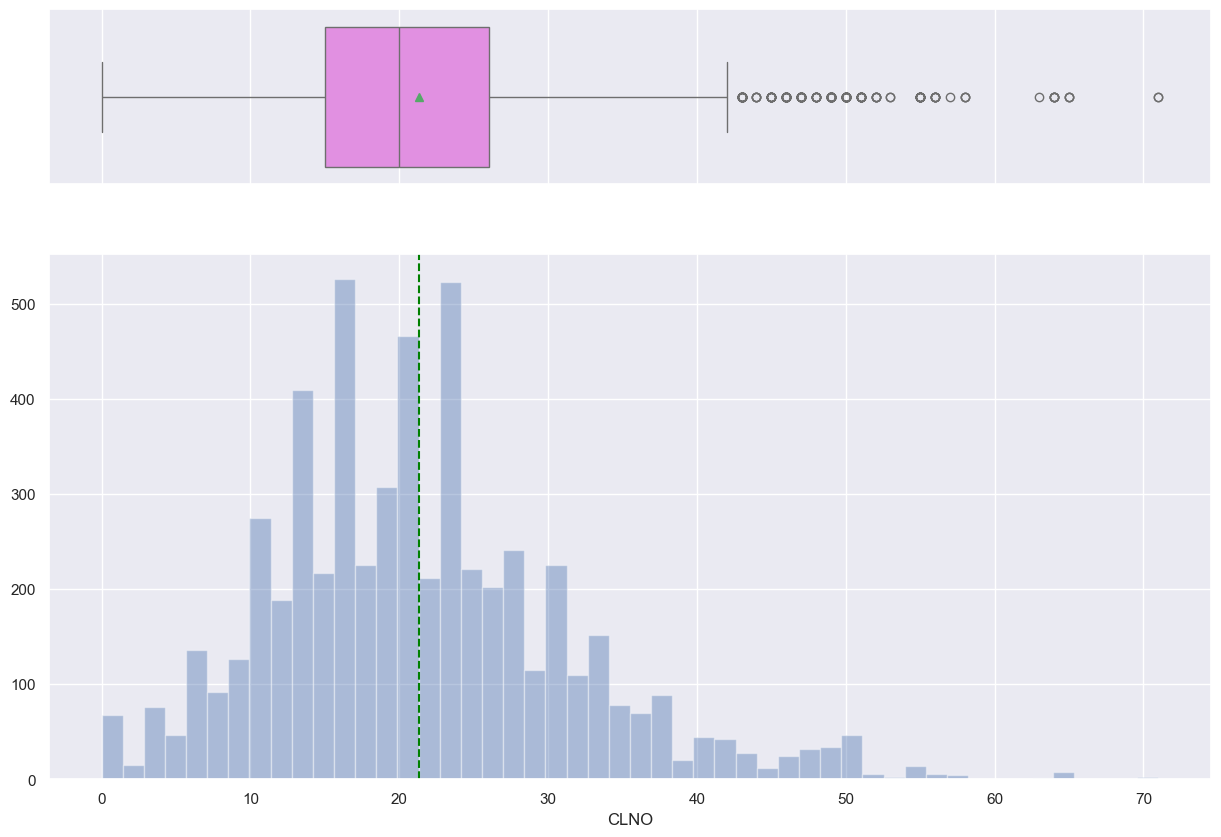

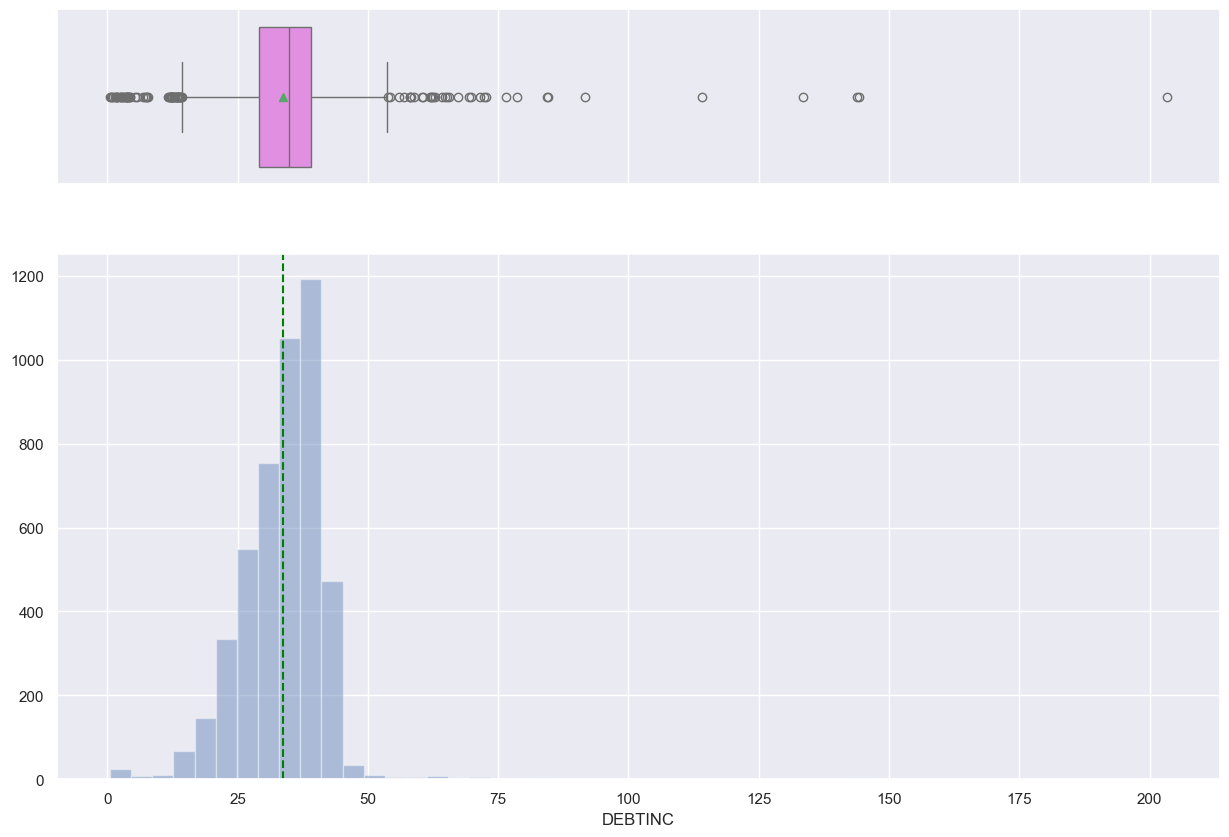

In [18]:
# Building the histogram boxplot for Loan
for i in num_cols:
    histogram_boxplot(data[i])

**Insights**

- The variable LOAN has a skewed distribution to the right with lot of big outliers compared to the mean.
- The variable MORTDUE has a skewed distribution to the right with lot of big outliers compared to the mean.
- The variable VALUE is slightly skewed to the right with many oultiers.
- The variable YOG is very skewed to the right and has a few outliers.
- The variable DEROG and DELINQ are discrete and are skewed to the right with some outliers.
- The variable CLAGE seems to follow a distribution normally shaped with two modes.
- The variable NINQ is skewed to the right with some outliers.
- The variable CLNO follows a normal shape distribution slightly skewed to the right.
- The variable DEBTINC follows a normal shape distribution with outliers at both sides.

### **2. Univariate Analysis - Categorical Data**

In [19]:
# Function to create barplots that indicate percentage for each category.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def plot_count_with_percentage(data, cols):
    for col in cols:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(y=data[col], palette='winter')

        total = len(data[col])
        for p in ax.patches:
            count = p.get_width()  # Bar width represents count
            if count > 0:
                percentage = f'{100 * count / total:.1f}%'
                ax.annotate(
                    percentage,
                    (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),  # Adjusted annotation placement
                    ha='left',
                    va='center',
                    fontsize=12
                )

        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

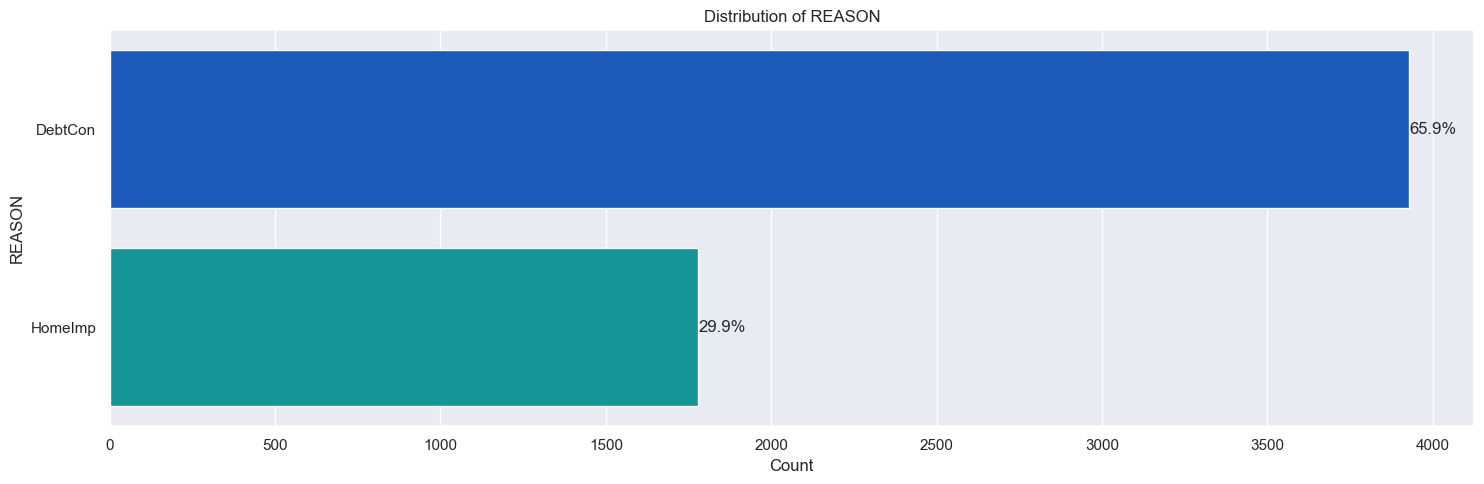

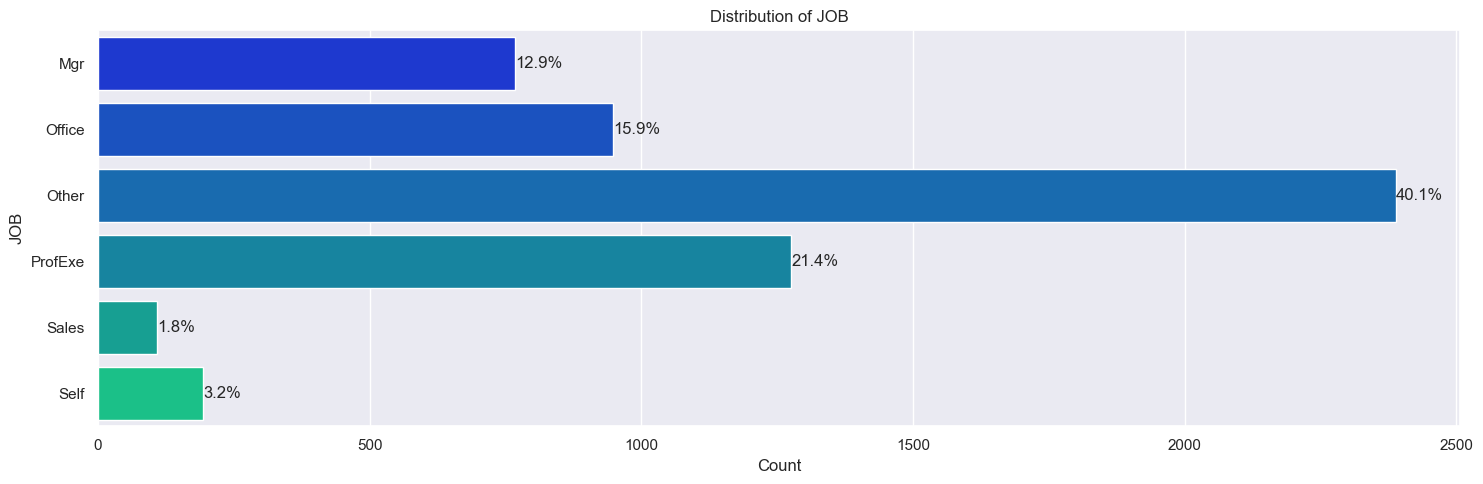

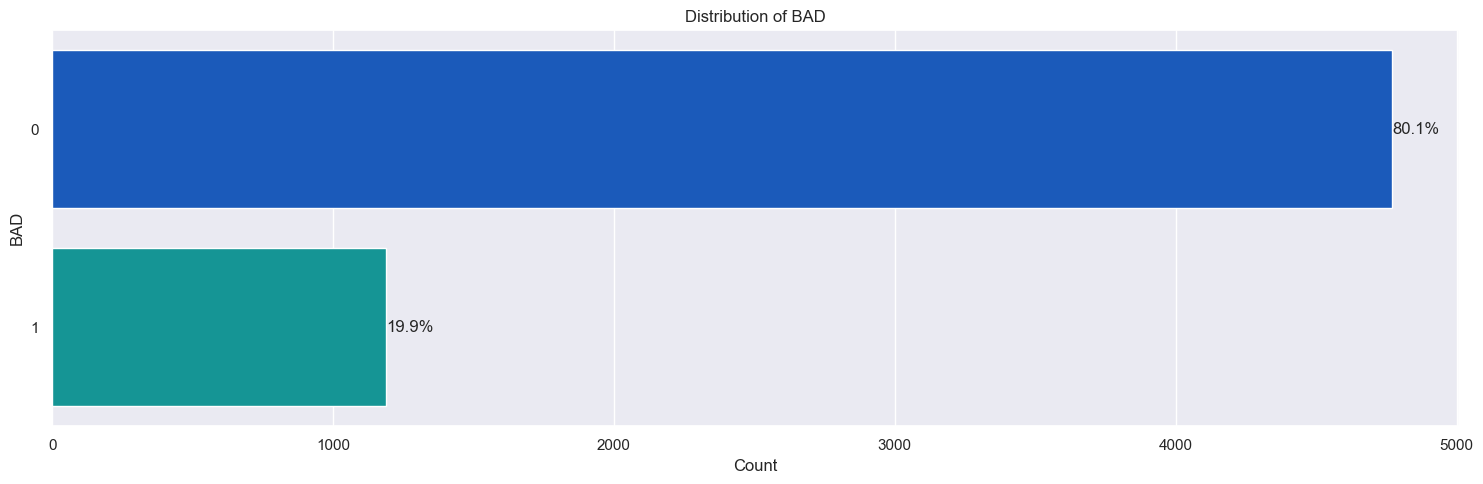

In [20]:
plot_count_with_percentage(data, cols)

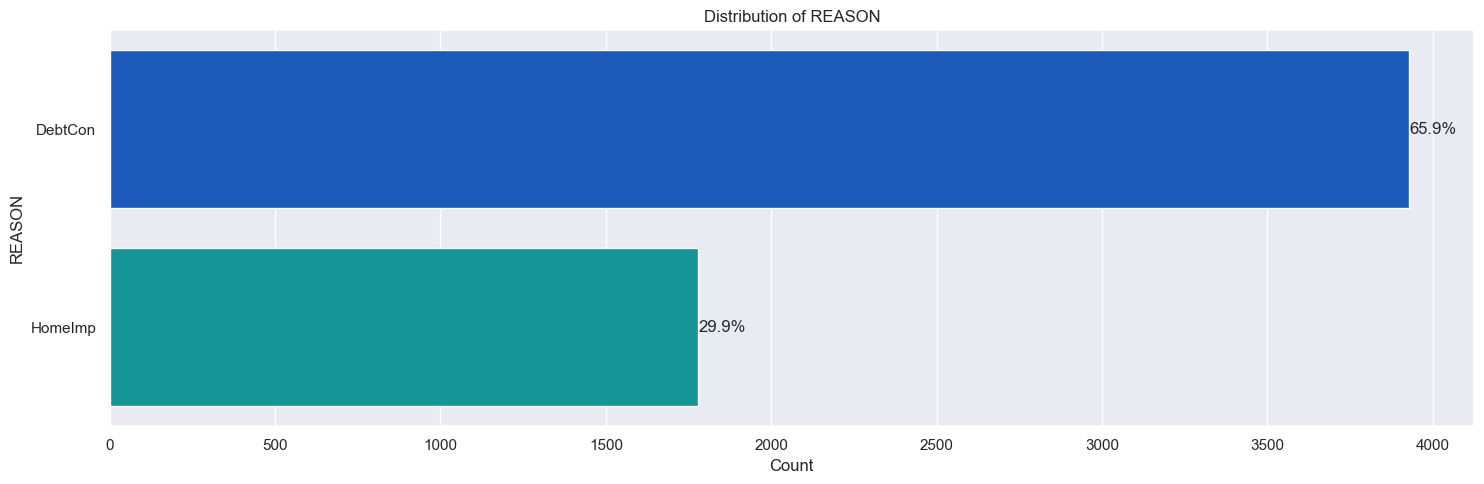

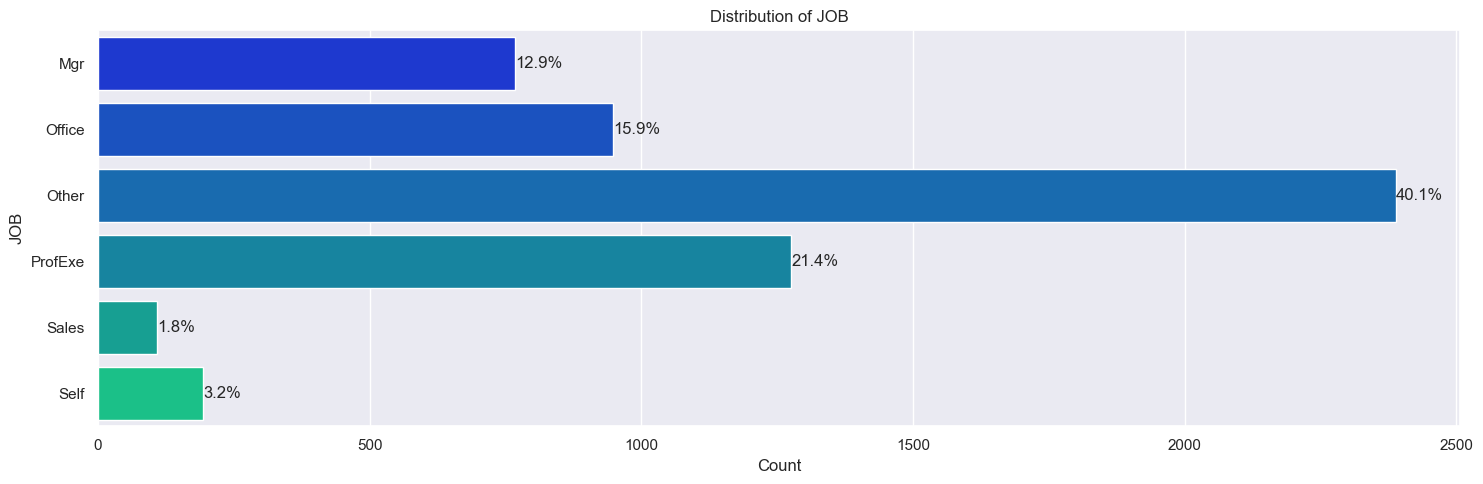

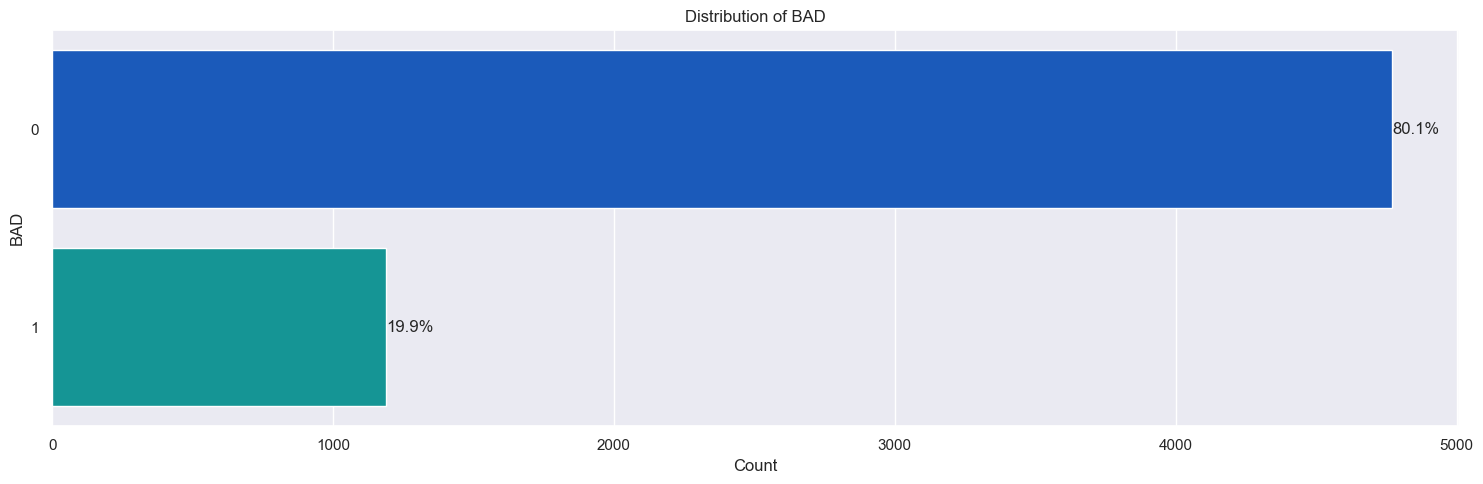

In [21]:
# Function to annotate percentage on top of bars
def perc_on_bar(ax, feature):
    total = len(feature)
    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            percentage = '{:.1f}%'.format(100 * width / total)
            x = width
            y = p.get_y() + p.get_height() / 2
            ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=12)

# Plotting horizontal barplot (barh) so column name is on Y-axis
for i in cols:
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(y=data[i], palette='winter')  # horizontal bars
    perc_on_bar(ax, data[i])
    plt.title(f'Distribution of {i}')
    plt.ylabel(i)  # Column name on Y-axis
    plt.xlabel('Count')  # Count on X-axis
    plt.tight_layout()
    plt.show()


**Insights**

- The variable JOB seems to follow a normal distribution.
- The other two variables REASON and BAD are just 80-20 and 70-30 respectively.

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<Axes: xlabel='DEBTINC', ylabel='BAD'>

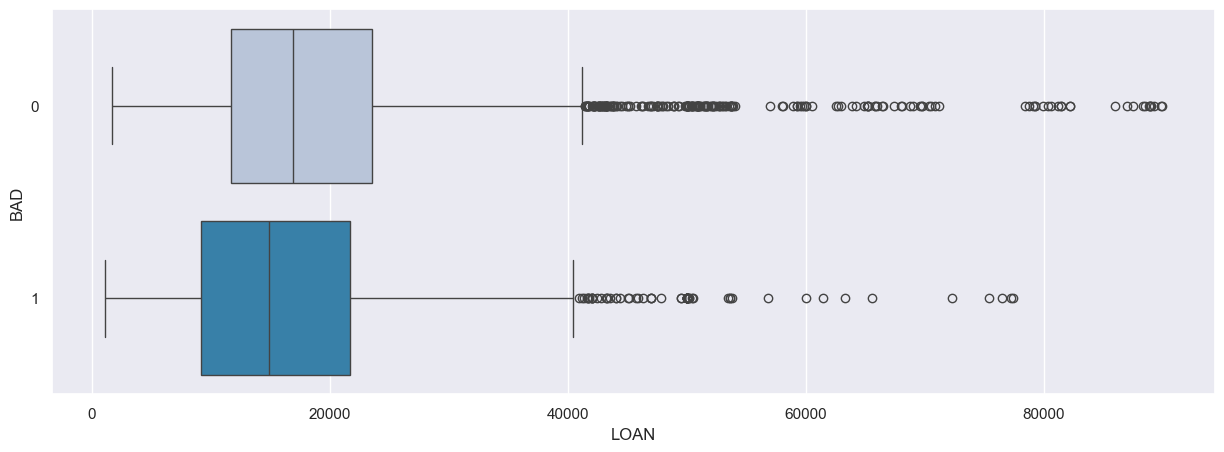

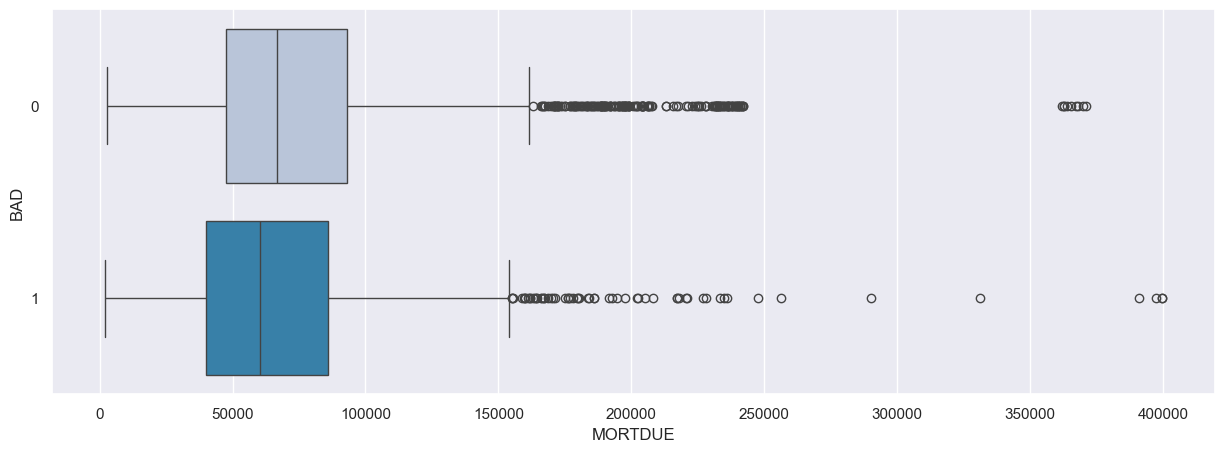

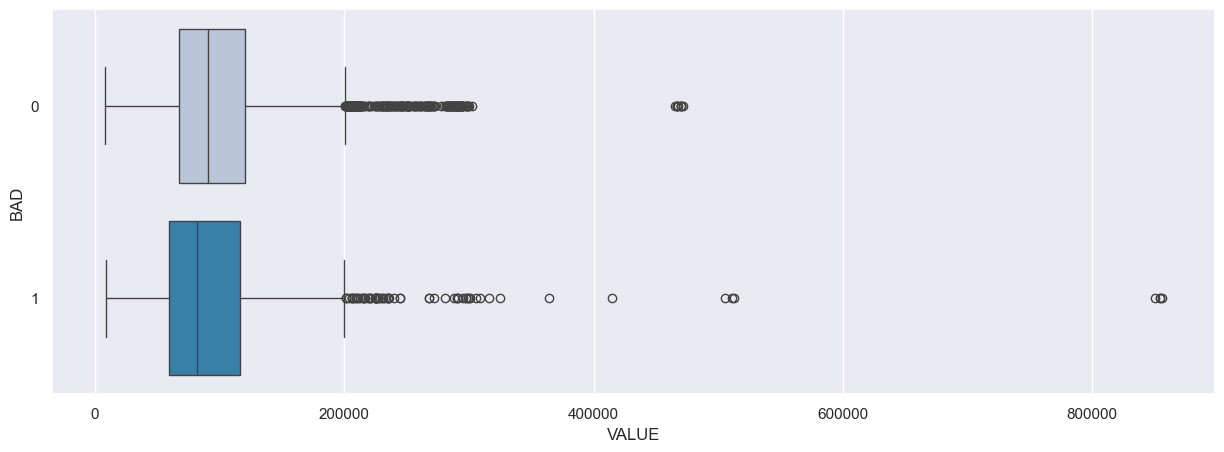

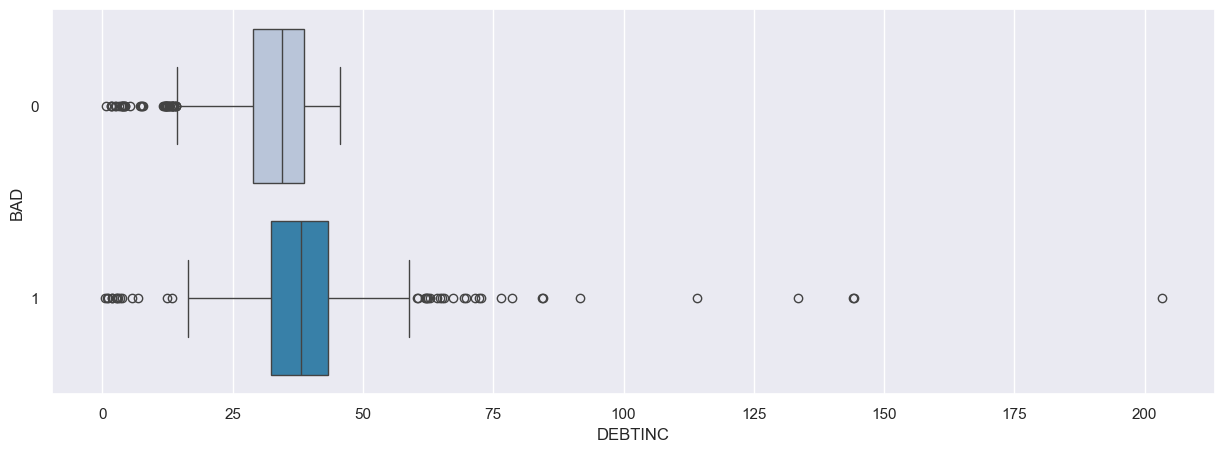

In [22]:
plt.figure(figsize=(15,5))
#sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="PuBu")
sns.boxplot(x=data["LOAN"],y=data['BAD'],palette="PuBu")
plt.figure(figsize=(15,5))
sns.boxplot(x=data["MORTDUE"],y=data['BAD'],palette="PuBu")
plt.figure(figsize=(15,5))
sns.boxplot(x=data["VALUE"],y=data['BAD'],palette="PuBu")
plt.figure(figsize=(15,5))
sns.boxplot(x=data["DEBTINC"],y=data['BAD'],palette="PuBu")

**Insights**

- BAD vs LOAN: it seems that independently of the type of client (defaulted or not) they receive the same amount of loans.
- BAD vs MORTDUE: it seems that independently of the type of client (defaulted or not) they have the same amount due on the existing mortgage.
- BAD vs VALUE: it seems that independently of the type of client (defaulted or not) there is no difference in the current value of the property.
- BAD vs DEBTINC: both type of clients seems to have very similar ratio.

### **Bivariate Analysis: Two Continuous Variables**

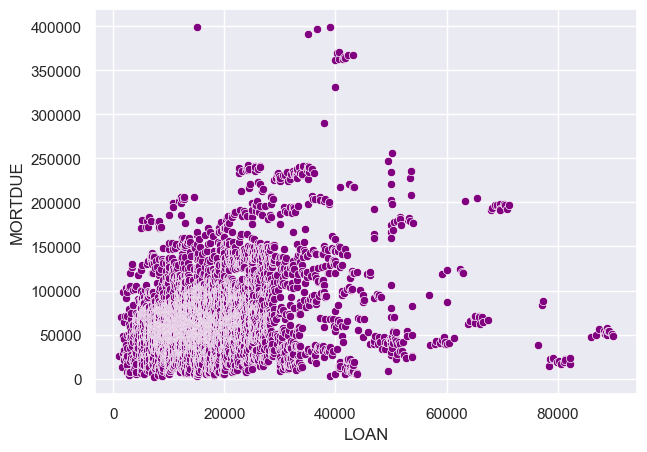

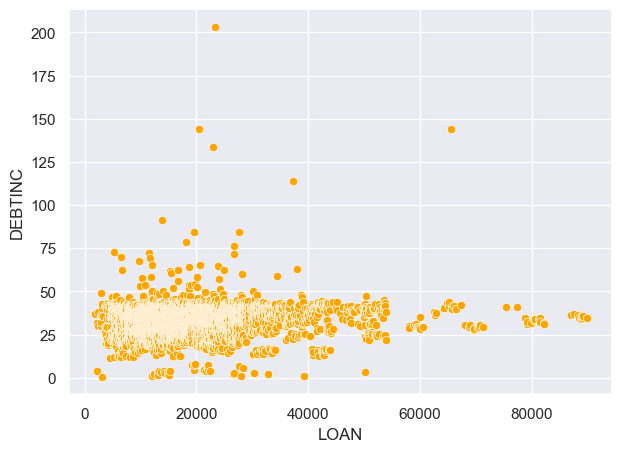

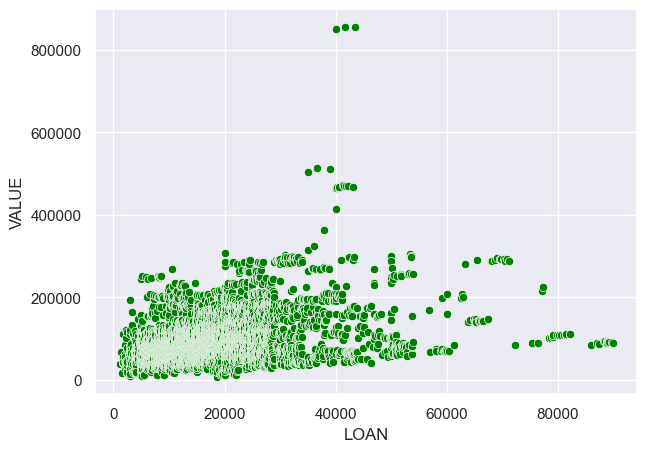

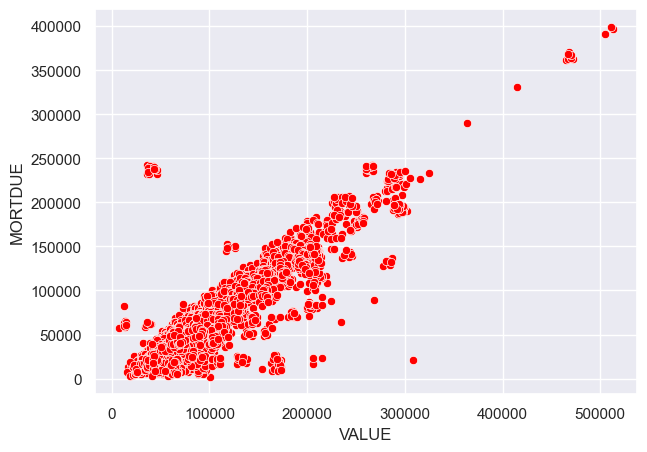

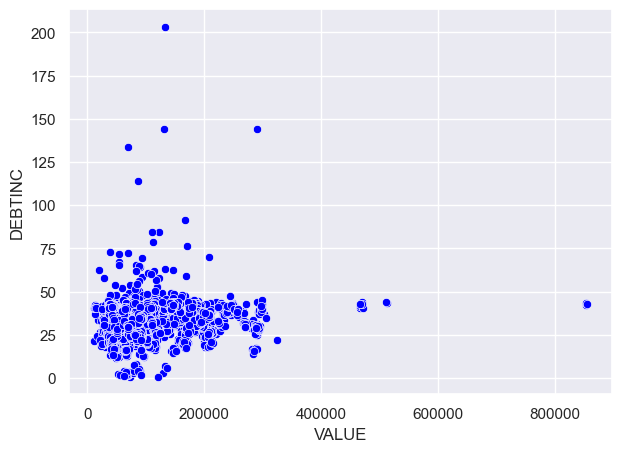

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots with color customization
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data["LOAN"], y=data['MORTDUE'], color='purple')  # single color
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data["LOAN"], y=data['DEBTINC'], color='orange')  # single color
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data["LOAN"], y=data['VALUE'], color='green')  # single color
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data["VALUE"], y=data['MORTDUE'], color='red')  # single color
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data["VALUE"], y=data['DEBTINC'], color='blue')  # single color

plt.show()

**Insights:**

- There seems to be a linear correlation between the variables VALUE and MORTDUE.
- There is no linear correlation between any other pair of variables.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart**

In [24]:
# Function to plot stacked bar charts with percentage on Y-axis and annotations
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x, data['BAD'], margins=True)
    print(tab1)
    print('-' * 120)

    # Get the normalized (percentage) crosstab
    tab = pd.crosstab(x, data['BAD'], normalize='index') * 100  # Convert to percentage

    # Plotting the stacked bar chart
    ax = tab.plot(kind='bar', stacked=True, figsize=(10, 5))

    # Annotating percentages on the bars
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x_pos = p.get_x() + width / 2  # Position for annotation (center of the bar)
        y_pos = p.get_y() + height / 2  # Center of each section in the stacked bar

        # Calculate percentage and add annotation
        percentage = f'{height:.1f}%'  # Round to 1 decimal place
        ax.annotate(percentage, (x_pos, y_pos), ha='center', va='center', fontsize=10, color='black')

    # Customizing Y-axis to show percentage
    ax.set_ylabel('Percentage (%)')

    # Adjusting legend and positioning
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


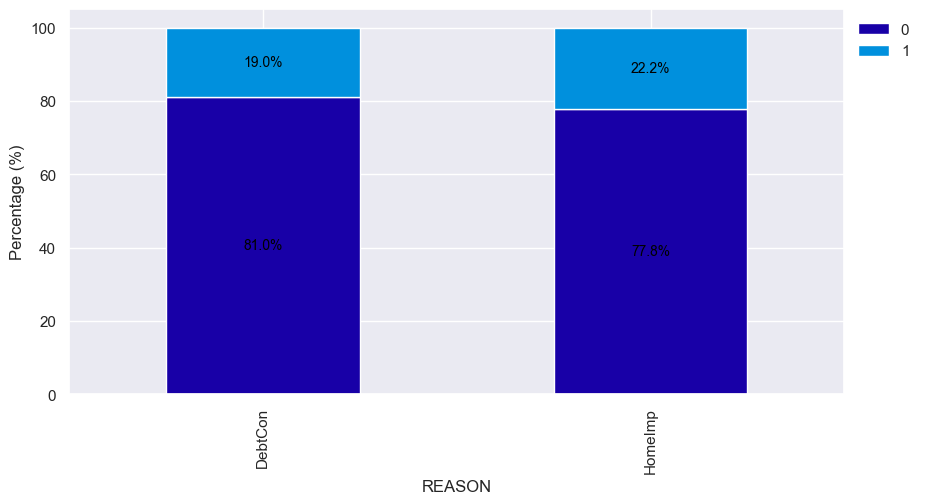

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


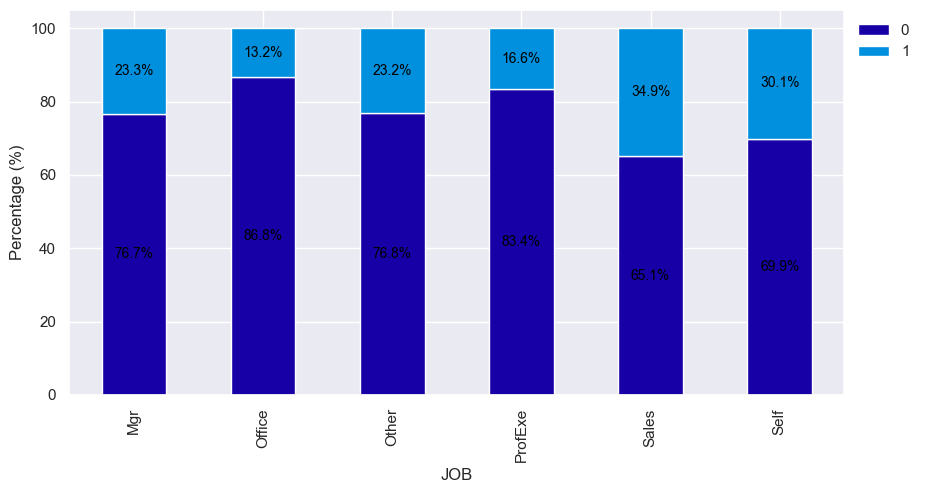

In [25]:
# Plotting stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])
stacked_plot(data['JOB'])

**Insights**

- In the first chart we can see that independently of the loan's reason 81% are non defaulted and 19% are defaulted clients.
- In the second chart, it is evident that individuals in sales have the highest percentage of defaulted loans, at 34.9%.
- Office employees and professional executive are the two kind of jobs with the lowest rate of defaulted loans, at 13.2% & 16.6%.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

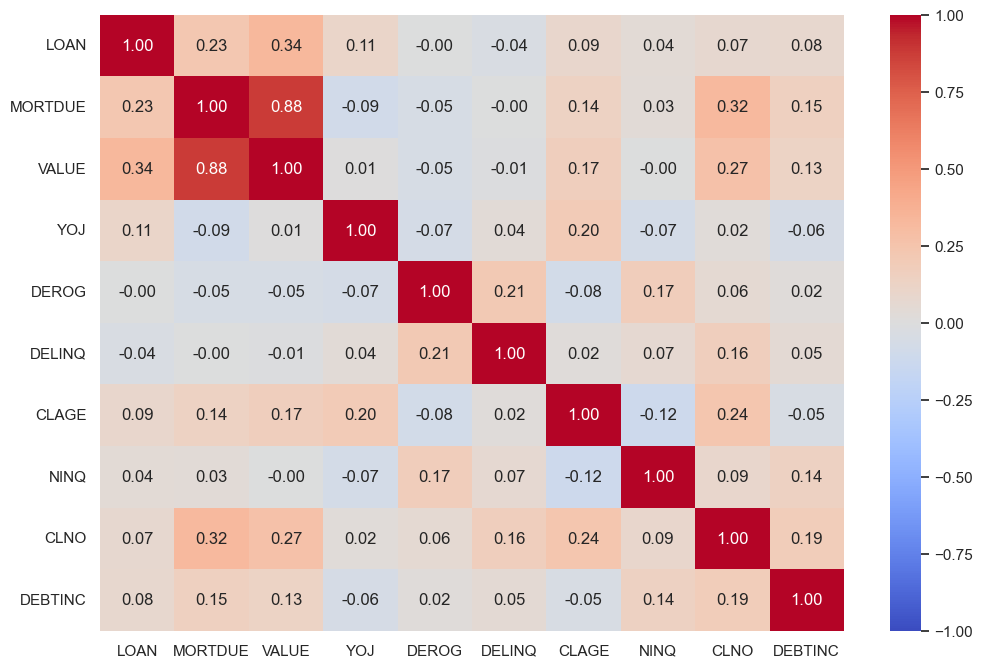

In [26]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Building correlation matrix for numerical columns
corr = data[numerical_col].corr()

# plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns);

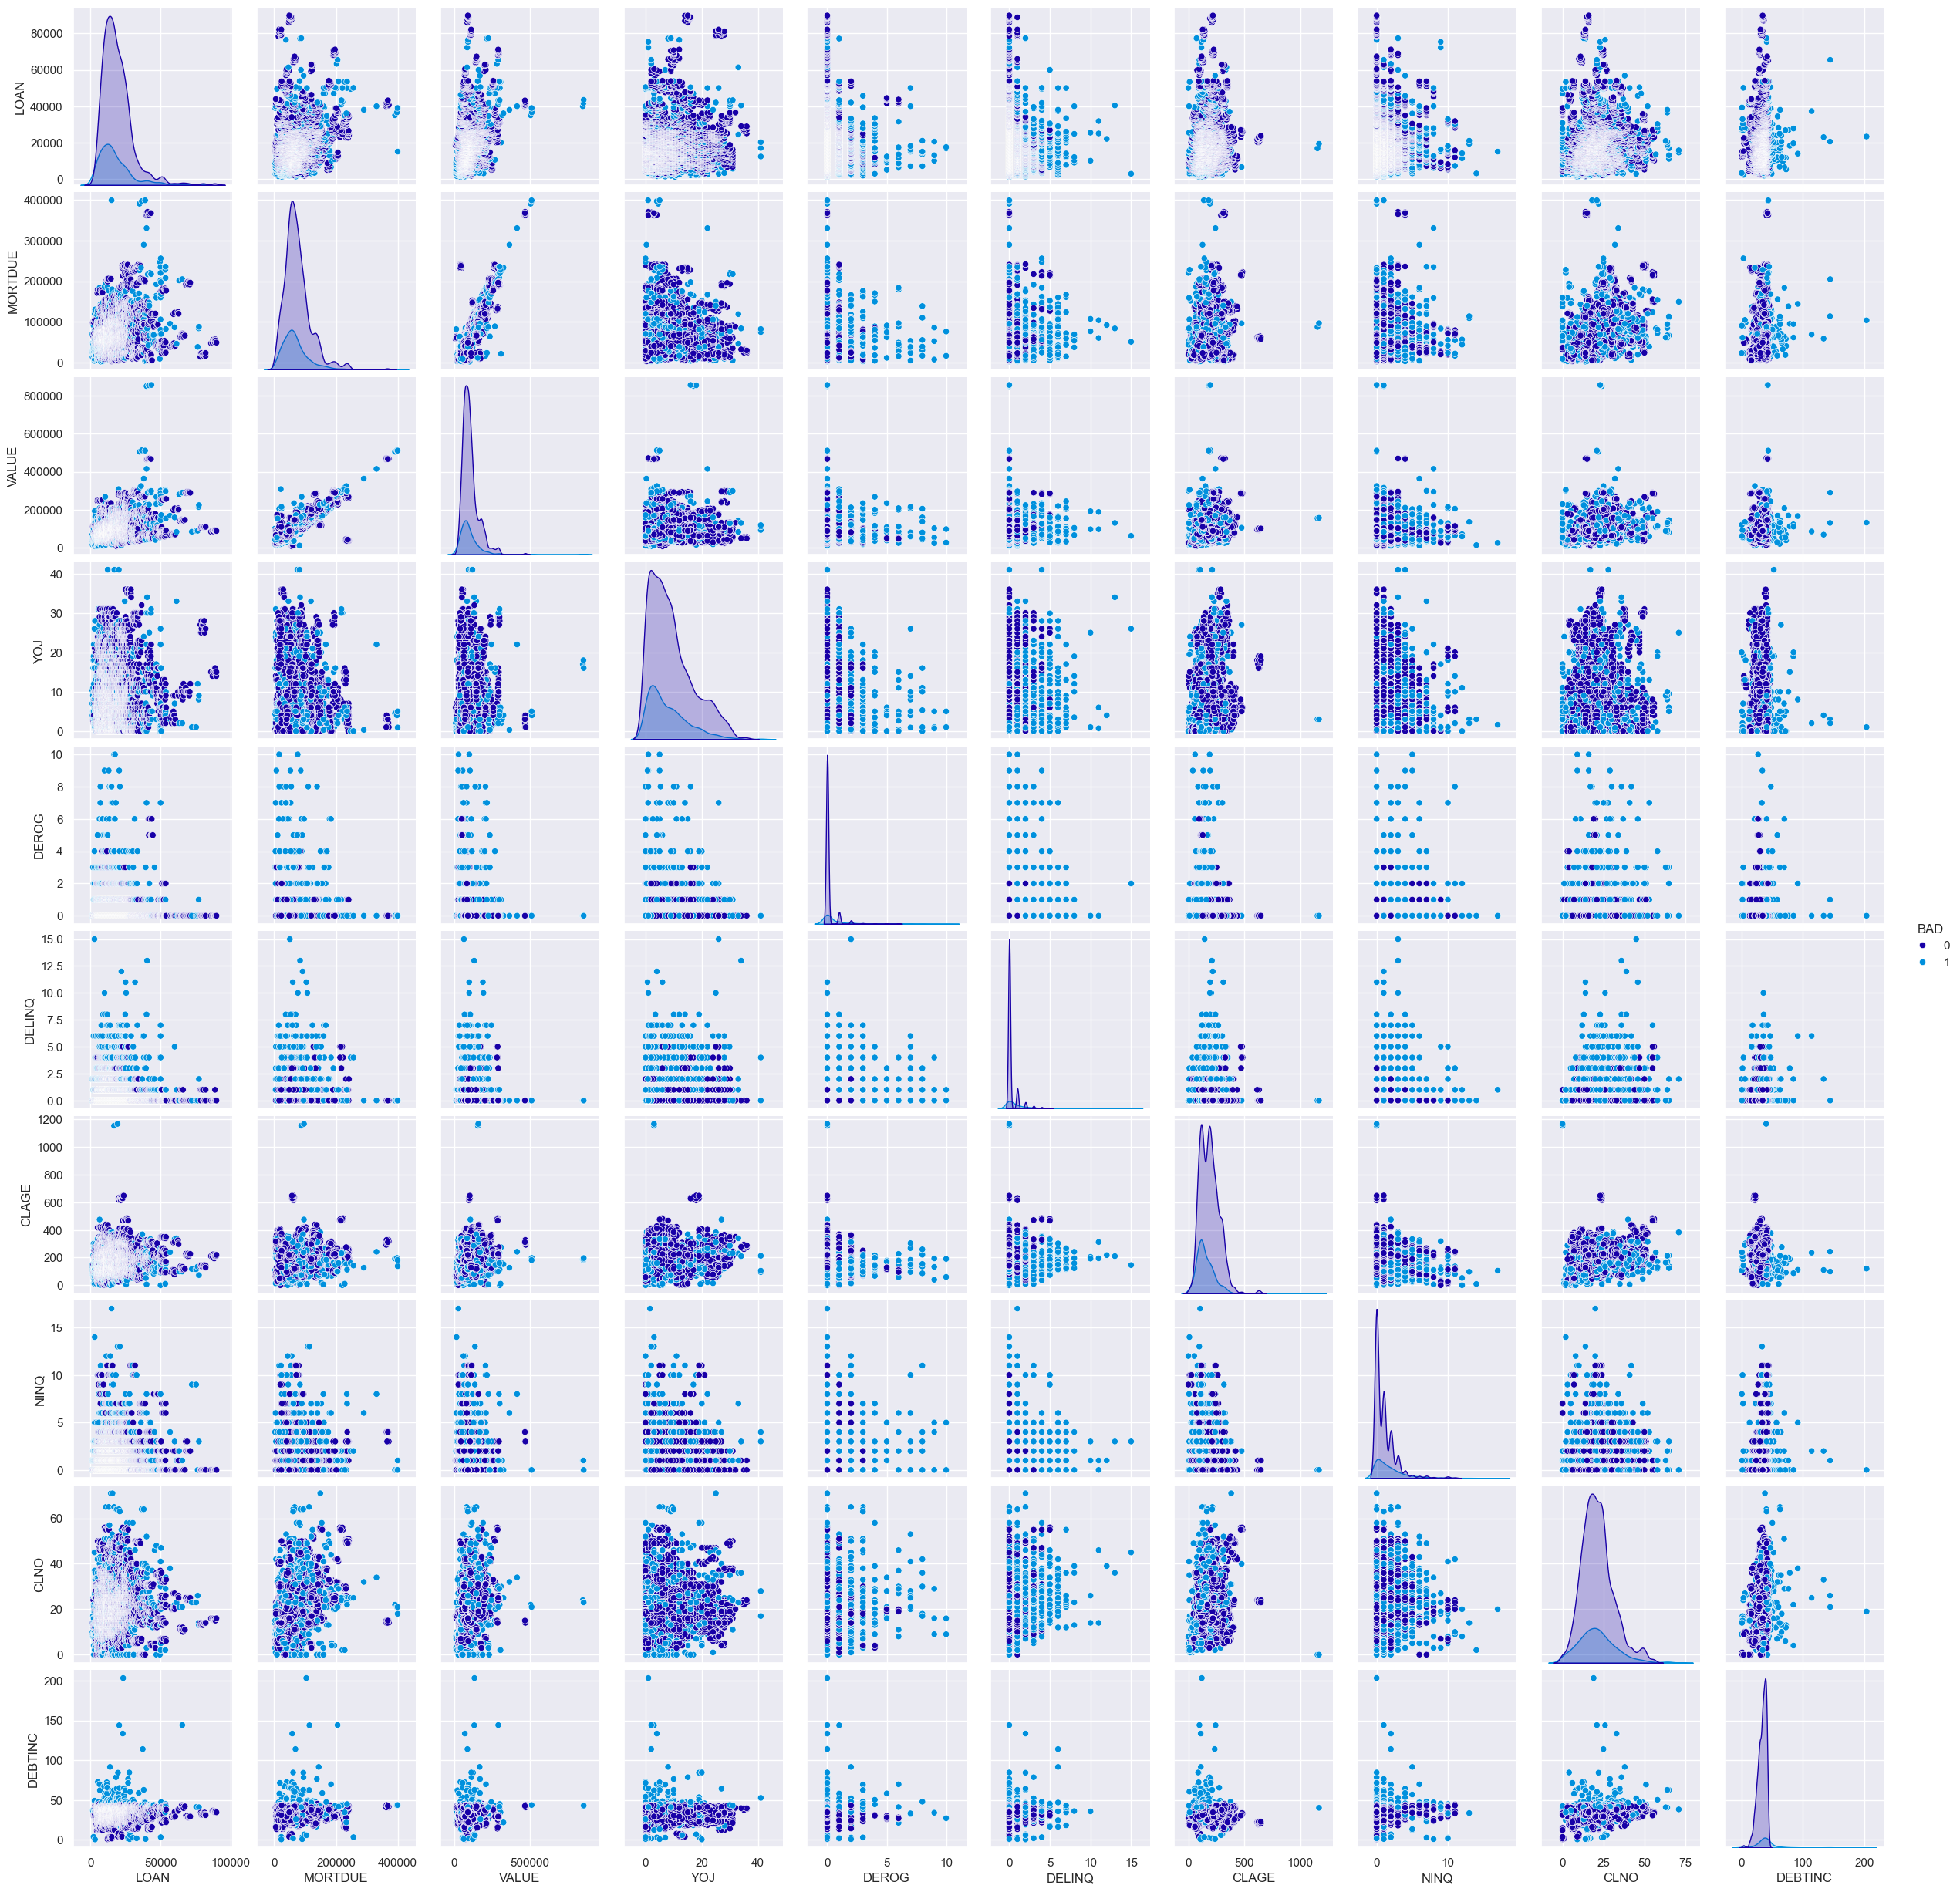

In [27]:
# Building pairplot for the data with hue = 'BAD'

sns.pairplot(data, hue="BAD")

In [28]:
df = data.copy()

In [29]:
df

BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0      1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1      1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2      1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3      1   1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4      0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ..    ...      ...       ...      ...     ...   ...    ...     ...   
5955   0  88900  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956   0  89000  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957   0  89200  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958   0  89800  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959   0  89900  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0        NaN  
1     121.833333   0.0  14.0        NaN  
2     149.466667   1.0  10.0        NaN  
3            NaN   NaN   NaN        NaN  
4      93.333333   0.0  14.0        NaN  
...          ...   ...   ...        ...  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  

[5960 rows x 13 columns]

#### Adding new columns in the dataset for each column which has missing values

In [30]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [31]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

#### Filling missing values in numerical columns with median and mode in categorical variables

In [32]:
#  Treating Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes(include=['number'])

# Selecting string and object columns.
cat_data = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Filling numeric columns with median.
df[num_data.columns] = df[num_data.columns].fillna(df[num_data.columns].median())

# Filling object columns with model.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)

In [33]:
df.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

In [34]:
df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  ...  VALUE_missing_values_flag  REASON_missing_values_flag  \
0   94.366667  ...                      False                       False   
1  121.833333  ...                      False                       False   
2  149.466667  ...                      False                       False   
3  173.466667  ...                       True                        True   
4   93.333333  ...                      False                       False   

   JOB_missing_values_flag  YOJ_missing_values_flag  \
0                    False                    False   
1                    False                    False   
2                    False                    False   
3                     True                     True   
4                    False                    False   

   DEROG_missing_values_flag  DELINQ_missing_values_flag  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                       True                        True   
4                      False                       False   

   CLAGE_missing_values_flag  NINQ_missing_values_flag  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                       True                      True   
4                      False                     False   

   CLNO_missing_values_flag  DEBTINC_missing_values_flag  
0                     False                         True  
1                     False                         True  
2                     False                         True  
3                      True                         True  
4                     False                         True  

[5 rows x 24 columns]

In [35]:
df.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955   0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956   0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957   0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958   0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959   0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  ...  VALUE_missing_values_flag  REASON_missing_values_flag  \
5955  221.808718  ...                      False                       False   
5956  208.692070  ...                      False                       False   
5957  212.279697  ...                      False                       False   
5958  213.892709  ...                      False                       False   
5959  219.601002  ...                      False                       False   

      JOB_missing_values_flag  YOJ_missing_values_flag  \
5955                    False                    False   
5956                    False                    False   
5957                    False                    False   
5958                    False                    False   
5959                    False                    False   

      DEROG_missing_values_flag  DELINQ_missing_values_flag  \
5955                      False                       False   
5956                      False                       False   
5957                      False                       False   
5958                      False                       False   
5959                      False                       False   

      CLAGE_missing_values_flag  NINQ_missing_values_flag  \
5955                      False                     False   
5956                      False                     False   
5957                      False                     False   
5958                      False                     False   
5959                      False                     False   

      CLNO_missing_values_flag  DEBTINC_missing_values_flag  
5955                     False                        False  
5956                     False                        False  
5957                     False                        False  
5958                     False                        False  
5959                     False                        False  

[5 rows x 24 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

### **Droping missing value flags**

In [37]:
#creating a list of bool features
bool_cols = df.select_dtypes(['bool']).columns.tolist()

#droping missing value flags
X = df.drop(columns = bool_cols)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


## **Data Preparation**

### **Separating the target variable from other variables**

In [39]:
# Separating the target variable and other variables
Y = X.BAD
X = X.drop(columns = ['BAD'])

# Creating dummy variables for the categorical variables

# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True)

### **Scaling the data**

In this case features have different scales, so we will use the Standard Scaler method, which centers and scales the dataset using the Z-Score.

In [40]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

### **Splitting the data into 70% train and 30% test set**

The data is unbalanced (~80% is non defaulted and ~20% is defaulted). For this reason, we will use **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [41]:
# Splitting the data into training and test set

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

## **Model Evaluation Criterion**


In [42]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Building a Logistic Regression Model**

- Logistic Regression is a supervised learning algorithm, generally used for **binary classification problems**, i.e., where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as:

                                          P(Y)=1/(1 + exp(-X))

In [43]:
# Defining the Logistic regression model
lg = LogisticRegression()

# Fitting the model on the training data
lg.fit(x_train,y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3340
           1       0.72      0.34      0.46       832

    accuracy                           0.84      4172
   macro avg       0.79      0.65      0.68      4172
weighted avg       0.83      0.84      0.82      4172



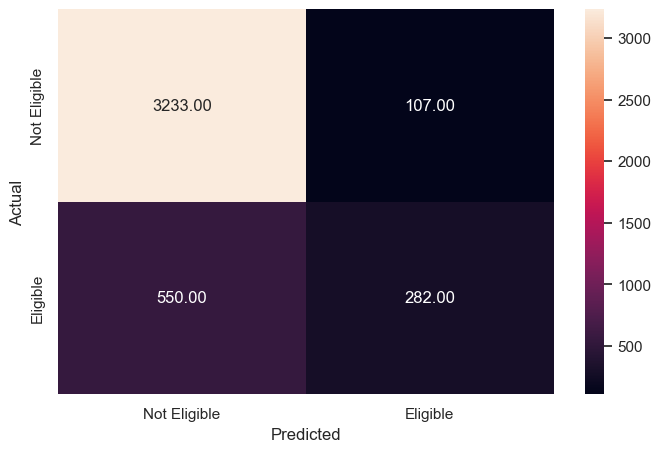

In [44]:
#Predicting for train set
y_pred_train = lg.predict(x_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1431
           1       0.70      0.28      0.40       357

    accuracy                           0.83      1788
   macro avg       0.77      0.63      0.65      1788
weighted avg       0.81      0.83      0.80      1788



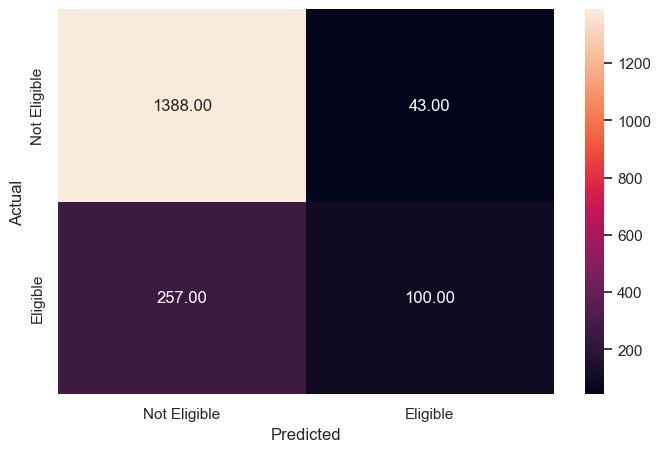

In [45]:
#Predicting for test set
y_pred_test = lg.predict(x_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

#### **Observations:**

- **We are getting an accuracy of about 85%** on the train and the test datasets.
- However, **the recall for this model is only around 34% for class 1 on the train data and 28% on the test data.**
- As the recall is low, **this model will not perform well** in differentiating out clients who have a high chance of defaulting the loan, meaning it will eventually not help in increasing the bank income.
- As we can see from the Confusion Matrix, **this model is not good at identifying clients who are at risk of defaulting.**

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [46]:
# Printing the coefficients of logistic regression

cols = X_scaled.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

0
DELINQ          0.853720
DEBTINC         0.537715
DEROG           0.485888
NINQ            0.241173
VALUE           0.220364
REASON_HomeImp  0.123781
JOB_Sales       0.099452
JOB_Self        0.091951
JOB_ProfExe    -0.026351
JOB_Other      -0.032524
YOJ            -0.108010
CLNO           -0.139250
JOB_Office     -0.196711
LOAN           -0.227976
MORTDUE        -0.230564
CLAGE          -0.455038

**Insights:**

**Features which positively affect on the defaulted rate are:**
- DEBTINC
- NINQ

**Features which negatively affect on the defaulted rate are:**
- MORTDUE
- CLAGE

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [47]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

odds
DELINQ          2.348367
DEBTINC         1.712091
DEROG           1.625619
NINQ            1.272742
VALUE           1.246530
REASON_HomeImp  1.131768
JOB_Sales       1.104566
JOB_Self        1.096311
JOB_ProfExe     0.973994
JOB_Other       0.967999
YOJ             0.897618
CLNO            0.870010
JOB_Office      0.821428
LOAN            0.796143
MORTDUE         0.794086
CLAGE           0.634424

- The odds of defaulting for a client with high debt/income ratio is 50% higher than one with low ratio.
- The odds of defaulting for a client with many recent credit inquiries is ~34% higher than one with a small number.

**The Precision-Recall Curve for Logistic Regression**

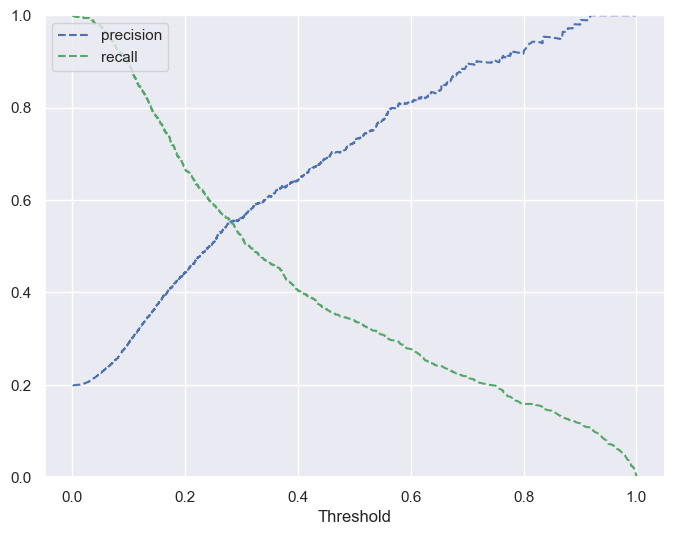

In [48]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (8, 6))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:**
- We can see that the precision and the recall are balanced for a threshold of about **0.30**.

**Let's find out the performance of the model at this threshold.**

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3340
           1       0.56      0.52      0.54       832

    accuracy                           0.82      4172
   macro avg       0.72      0.71      0.71      4172
weighted avg       0.82      0.82      0.82      4172



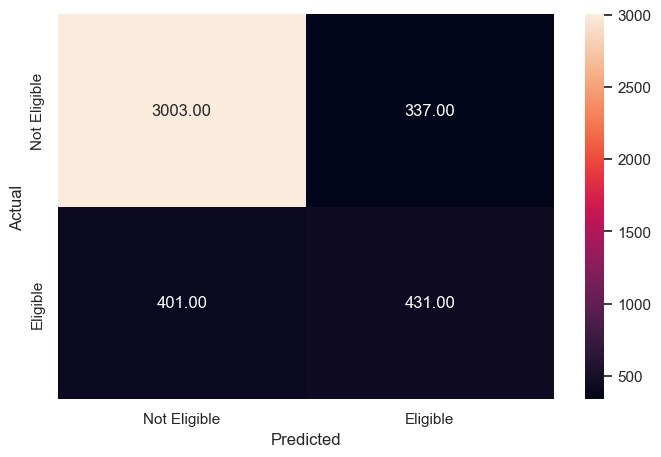

In [49]:
optimal_threshold1 = .30

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

**Observations:**

- **The model performance has improved. The recall has increased significantly for class 1 to 52%.**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1431
           1       0.56      0.48      0.51       357

    accuracy                           0.82      1788
   macro avg       0.72      0.69      0.70      1788
weighted avg       0.81      0.82      0.81      1788



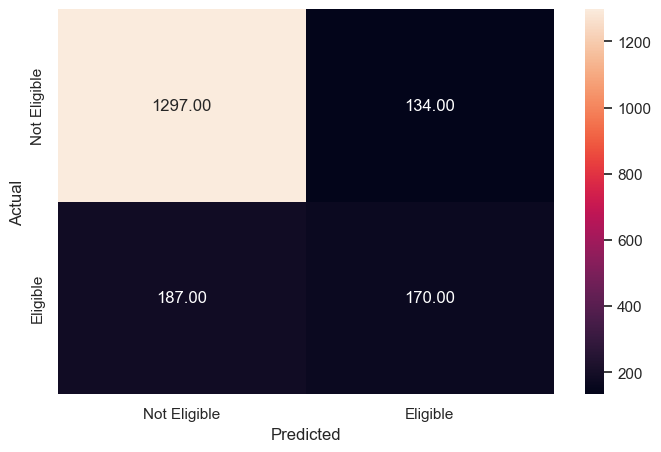

In [50]:
optimal_threshold1 = .30

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observations:**

- The model is giving a **similar performance on the test and the train datasets**, i.e., the model is giving a generalized performance.
- **The recall of the test data has increased to 48%** while at the same time, the precision has decreased slightly, which is to be expected while adjusting the threshold.
- Nevertheless, Recall is still low.

### **Build a Decision Tree Model**

**Observation: We aren't going to treat de outliers** in order to build the model because small changes in the training data can result in a large change in the tree and consequently the final predictions.

#### Data Preparation for the tree based model

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

In [52]:
#copying df to another variable
data = df.copy()

#### Separating the target variable y and independent variable x

In [53]:
# Separating the target variable and other variables
Y = data.BAD
X = data.drop(columns = ['BAD'])

# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True)

In [54]:
X

LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0      1100  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1      1300  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0  14.0   
2      1500  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3      1500  65019.0   89235.5   7.0    0.0     0.0  173.466667   1.0  20.0   
4      1700  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   
...     ...      ...       ...   ...    ...     ...         ...   ...   ...   
5955  88900  57264.0   90185.0  16.0    0.0     0.0  221.808718   0.0  16.0   
5956  89000  54576.0   92937.0  16.0    0.0     0.0  208.692070   0.0  15.0   
5957  89200  54045.0   92924.0  15.0    0.0     0.0  212.279697   0.0  15.0   
5958  89800  50370.0   91861.0  14.0    0.0     0.0  213.892709   0.0  16.0   
5959  89900  48811.0   88934.0  15.0    0.0     0.0  219.601002   0.0  16.0   

        DEBTINC  ...  CLAGE_missing_values_flag  NINQ_missing_values_flag  \
0     34.818262  ...                      False                     False   
1     34.818262  ...                      False                     False   
2     34.818262  ...                      False                     False   
3     34.818262  ...                       True                      True   
4     34.818262  ...                      False                     False   
...         ...  ...                        ...                       ...   
5955  36.112347  ...                      False                     False   
5956  35.859971  ...                      False                     False   
5957  35.556590  ...                      False                     False   
5958  34.340882  ...                      False                     False   
5959  34.571519  ...                      False                     False   

      CLNO_missing_values_flag  DEBTINC_missing_values_flag  REASON_HomeImp  \
0                        False                         True            True   
1                        False                         True            True   
2                        False                         True            True   
3                         True                         True           False   
4                        False                         True            True   
...                        ...                          ...             ...   
5955                     False                        False           False   
5956                     False                        False           False   
5957                     False                        False           False   
5958                     False                        False           False   
5959                     False                        False           False   

      JOB_Office  JOB_Other  JOB_ProfExe  JOB_Sales  JOB_Self  
0          False       True        False      False     False  
1          False       True        False      False     False  
2          False       True        False      False     False  
3          False       True        False      False     False  
4           True      False        False      False     False  
...          ...        ...          ...        ...       ...  
5955       False       True        False      False     False  
5956       False       True        False      False     False  
5957       False       True        False      False     False  
5958       False       True        False      False     False  
5959       False       True        False      False     False  

[5960 rows x 27 columns]

#### Split the data

In [55]:
# Split the data into training and test set (We use Stratify = 1 because data is unbalanced)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [56]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [57]:
#fitting Decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



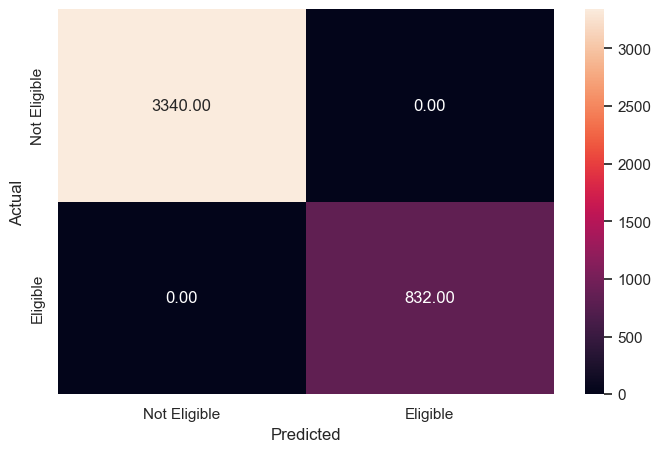

In [58]:
# Checking performance on the training data

y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1431
           1       0.74      0.62      0.68       357

    accuracy                           0.88      1788
   macro avg       0.82      0.78      0.80      1788
weighted avg       0.88      0.88      0.88      1788



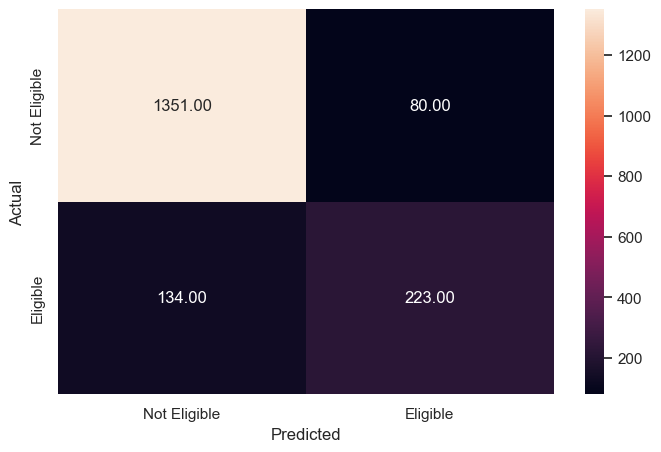

In [59]:
# Checking performance on the testing data

y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Insights**

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.62 in comparison to 1.00 for the training dataset, i.e., the Decision Tree is **overfitting the training data.**
- The precision on the test data suggests that there's a 27% (1 - 0.73) chance that the model will predict that a client is going to default even though he/she would not (false positive), increasing the risk for  **the bank to loses income.**
- The **recall** in this model is greater than in logistical regression: 0.62 vs. 0.48.

### **Decision Tree - Hyperparameter Tuning**

* We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**Let's plot the feature importance and check the most important features.**

<Axes: xlabel='Importance', ylabel='None'>

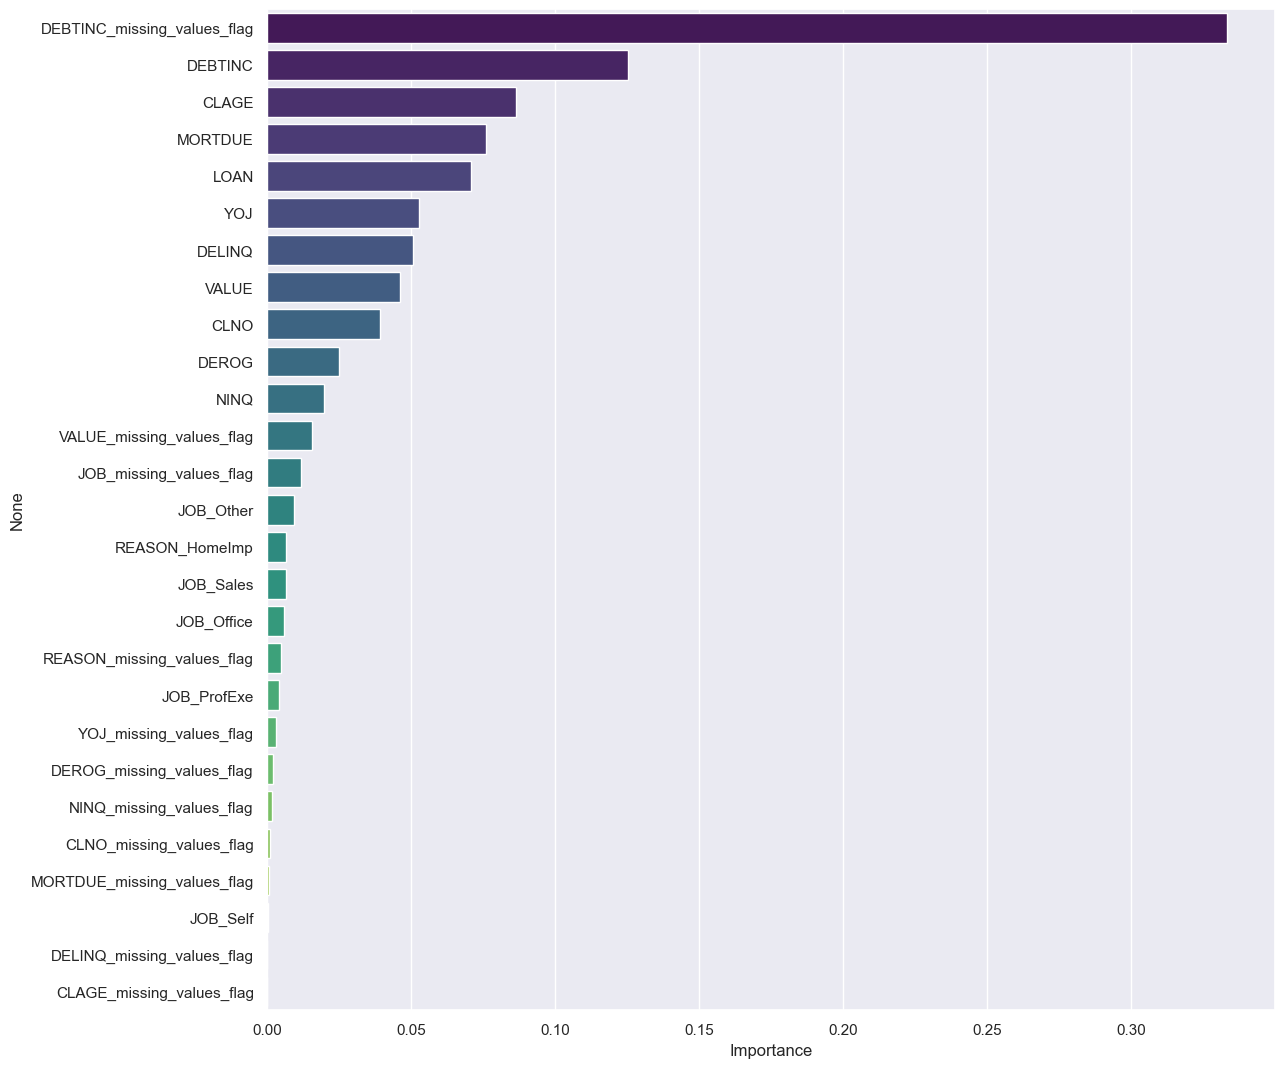

In [60]:
# Plotting the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index,  palette='viridis')

- According to the Decision Tree, DEBTINC_missing_values_flag is the most important feature, followed by DEBTINC, CLAGE and LOAN.
- This might signify that any client with no data in the DEBTINC ratio, will not receive any loan.
- The other important features are MORTDUE, VALUE.

#### Using GridSearchCV for Hyperparameter tuning on the model

In [61]:
# Choosing the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)


# Fitting the GridSearch on train dataset
gridCV = gridCV.fit(x_train, y_train)


# Setting the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_


# Fitting the best algorithm to the data.
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=np.int64(5),
                       min_samples_leaf=25, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3340
           1       0.64      0.79      0.71       832

    accuracy                           0.87      4172
   macro avg       0.79      0.84      0.81      4172
weighted avg       0.88      0.87      0.88      4172



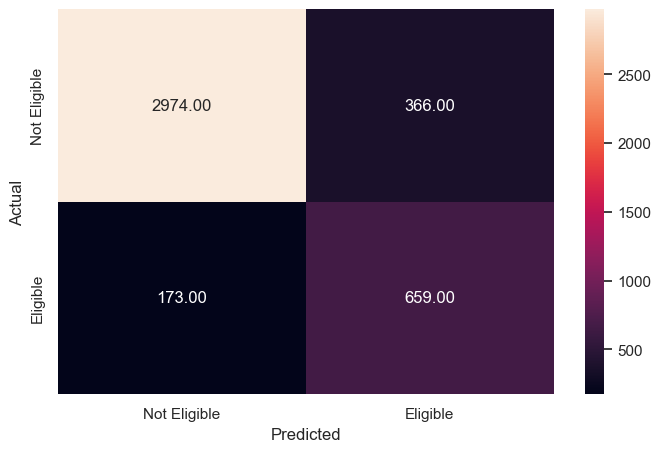

In [62]:
# Checking performance on the training data based on the tuned model

y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1431
           1       0.62      0.74      0.68       357

    accuracy                           0.86      1788
   macro avg       0.78      0.81      0.79      1788
weighted avg       0.87      0.86      0.86      1788



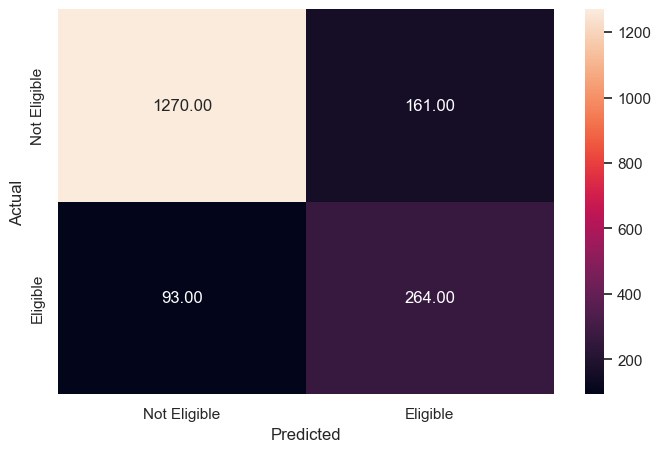

In [63]:
# Checking performance on the testing data based on the tuned model

y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)


**Insights**

- In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly (1.00 to 0.74)** This makes sense because we are trying to reduce overfitting.
- The tuned model is performing well in comparison to the model with default values of hyperparameters: **Recall increases from 0.61 to 0.74** in test data.
- **This model is not overfitting** the training data and giving approximately the same result on the test and train datasets.
- **Precision has gone down significantly from .73 to .62** in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the client is going to default even if he/she won't, and this will increases the risk of losing income.

**Let's look at the feature importance of this model and try to analyze why this is happening.**

<Axes: xlabel='Importance', ylabel='None'>

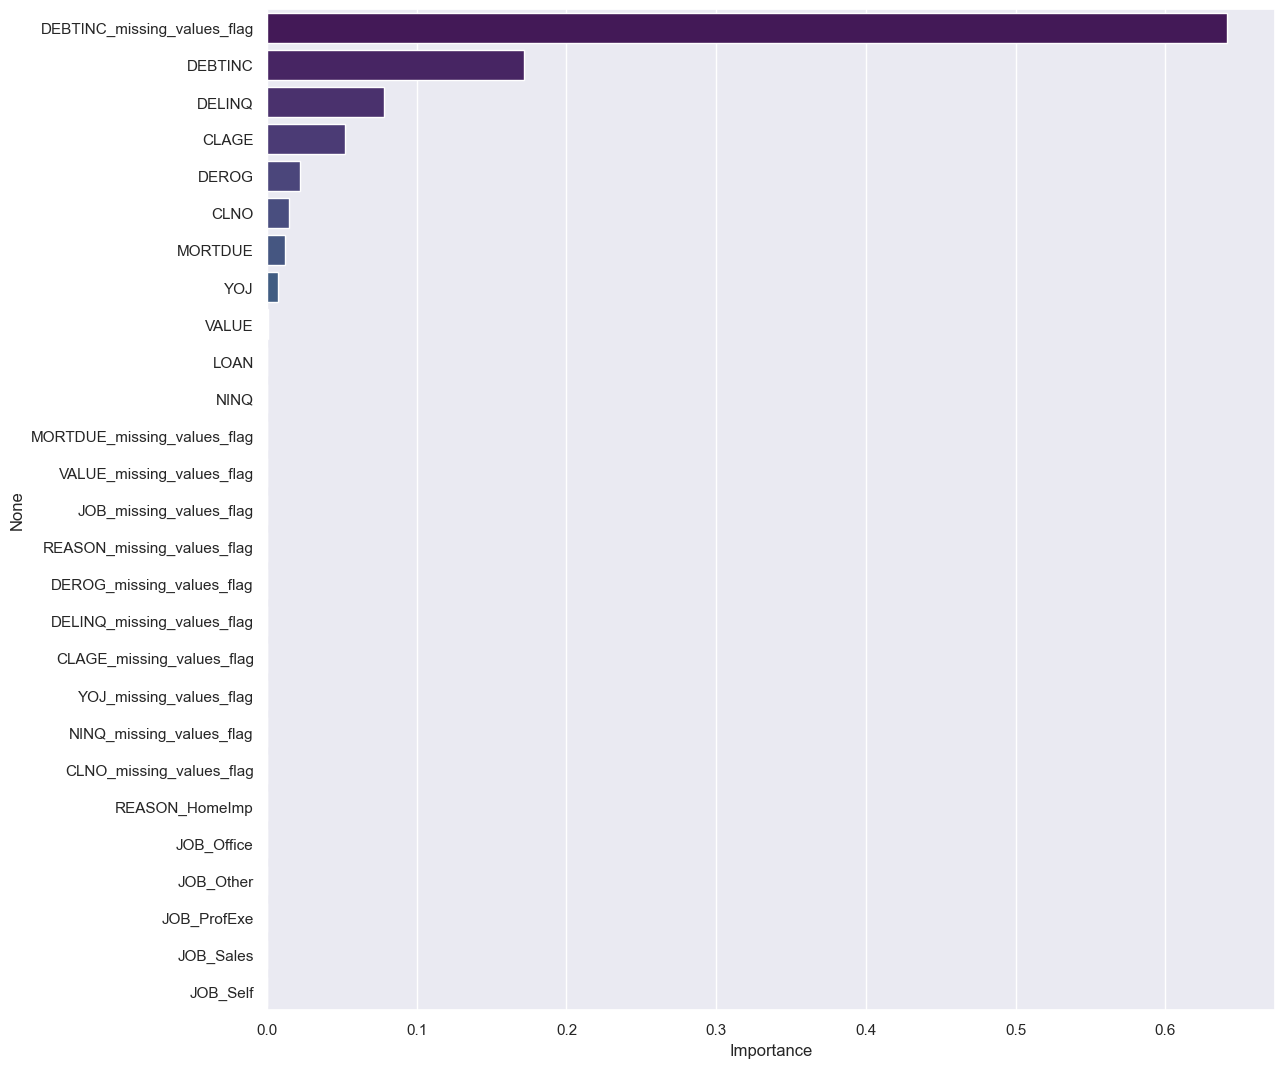

In [64]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index,palette='viridis')

**Observations:**

- After tuning the model we are getting that only 8 features are important. It seems like **the model is having high bias**, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
- According to this model too, `DEBTINC_missing_value`, `DEBTINC`, `DELINQ`, `CLAGE`, `DEROG`, `CLNO`, `MORTDUE`and `YOG` are the most important features that describe why a client is defaulting.

#### Plotting the Decision Tree

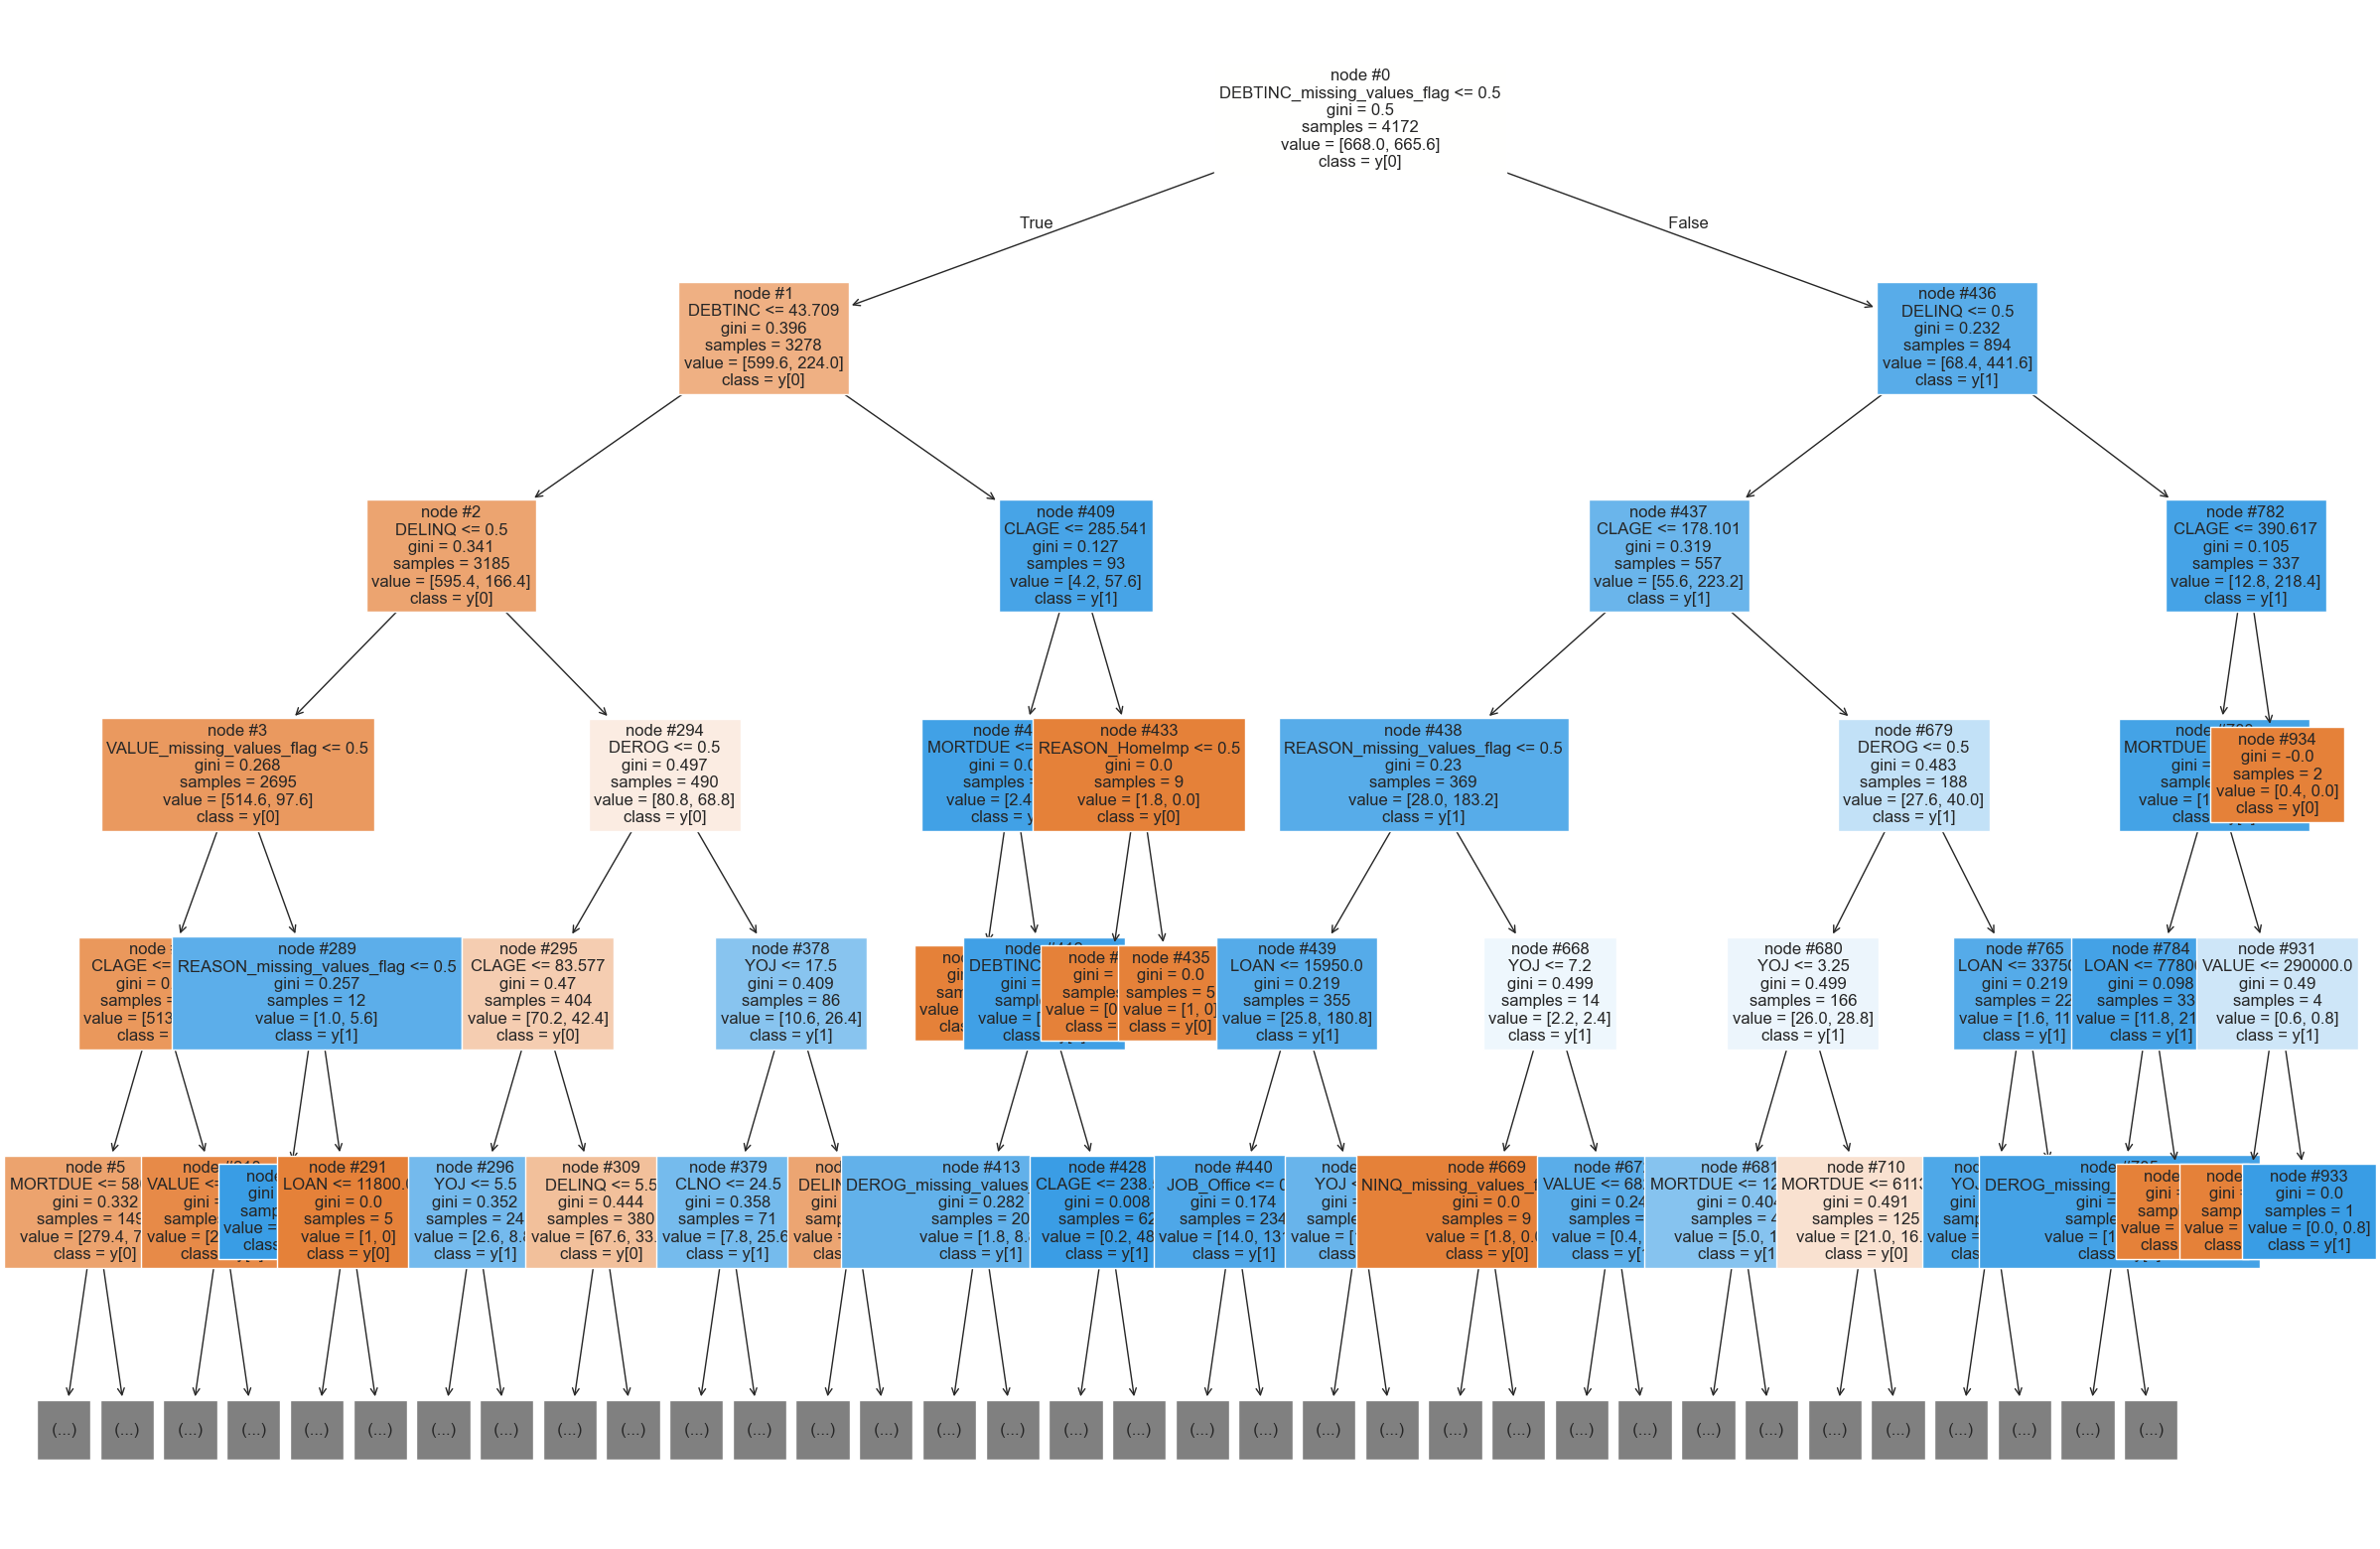

In [65]:
# Plotting the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 5, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### **Note:**

Blue leaves represent the attrition, i.e., **y[1]** and the orange leaves represent the non-attrition, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Business rules:**

- When DEBTINC ratio data isn't present and the client has delinquent credit lines and the age of the oldest credit line is smaller than 390.6 months, then the client have a hign chance to default.
- When DEBTINC ratio data isn't present and the client doesn't have delinquent credit lines, he/she has a high chance to default.
- If the DEBTINC ratio data is present and the DEBTINC ratio is greater than 43.7 and the age of the oldest credit line is smaller than 285.5 months, the client has a chance to default.
- If the DEBTINC ratio data is present and the DEBTINC ratio is smaller than 43.7 but the client has derogatory reports, he/she has a chance to default.
- If the DEBTINC ratio data is present and the DEBTINC ratio is smaller than 43.7 but VALUE isn't present, there is chance to default.
- If the DEBTINC ratio data is present and the DEBTINC ratio is smaller than 43.7 and VALUE is present, there is a high chance to not default.
- If the DEBTINC ratio data is present and the DEBTINC ratio is greater than 43.7 and the age of the oldest credit line is greater than 285.5 months, the client won't default.
- When DEBTINC ratio data isn't present and the client has delinquent credit lines and the age of the oldest credit line is greater than 390.6 months, then the client won't default.



### **Building a Random Forest Classifier**


In [66]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



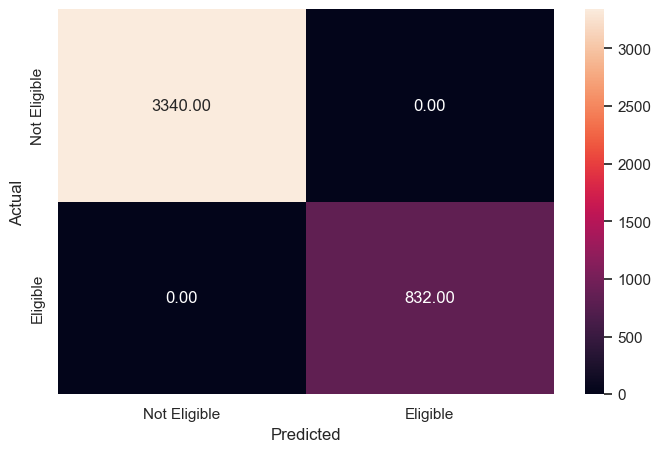

In [67]:
#Checking performance on the training data

y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1431
           1       0.84      0.68      0.75       357

    accuracy                           0.91      1788
   macro avg       0.88      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



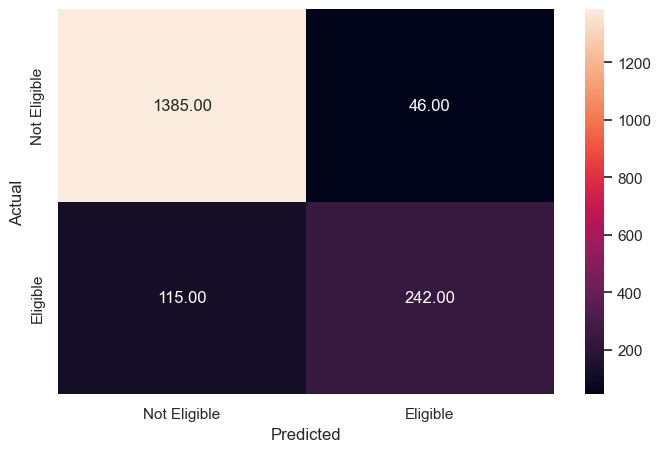

In [68]:
# Checking performance on the test data

y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the **recall** on the test data is only **0.68 for class 1 (lower than the tuned Decision Tree).**
- Precision is high for the test data as well.

### **Build a Random Forest model with Class Weights**

In [69]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Fitting Random Forest model
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



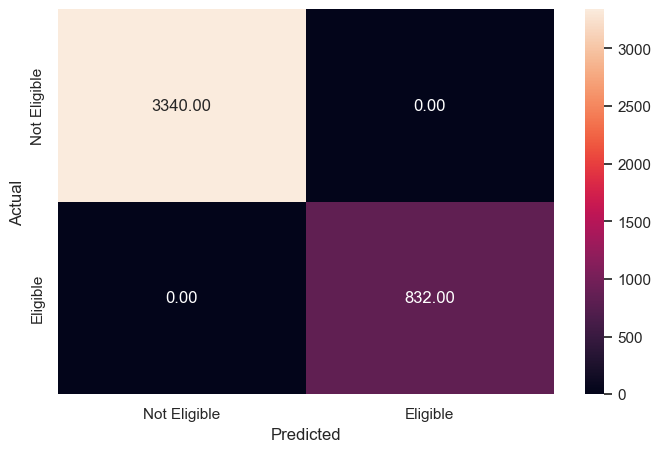

In [70]:
# Checking performance on the train data

y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1431
           1       0.84      0.64      0.73       357

    accuracy                           0.90      1788
   macro avg       0.88      0.81      0.83      1788
weighted avg       0.90      0.90      0.90      1788



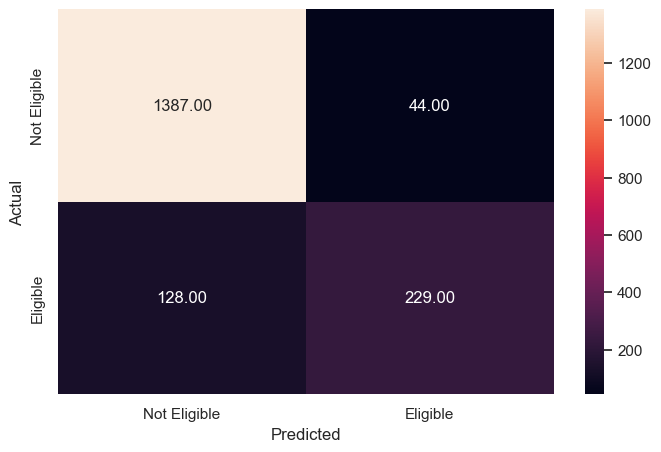

In [71]:
# Checking performance on the test data

y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Observations**

- The random forest classifier is still **overfitting** in the training data.
- **Recall** decreased from **.68 to .63**.
- Precision is still high for the test data as well.
- Using class_weight={0: 0.2, 1: 0.8} got worse results. When we increase class weight for class 0, recall improves a little bit, for instance: class_weight={0: 0.5, 1: 0.5} which is the default classifier we obtained a higher recall 0.68.

#### Plot the Feature importance of the Random Forest

<Axes: xlabel='Importance', ylabel='None'>

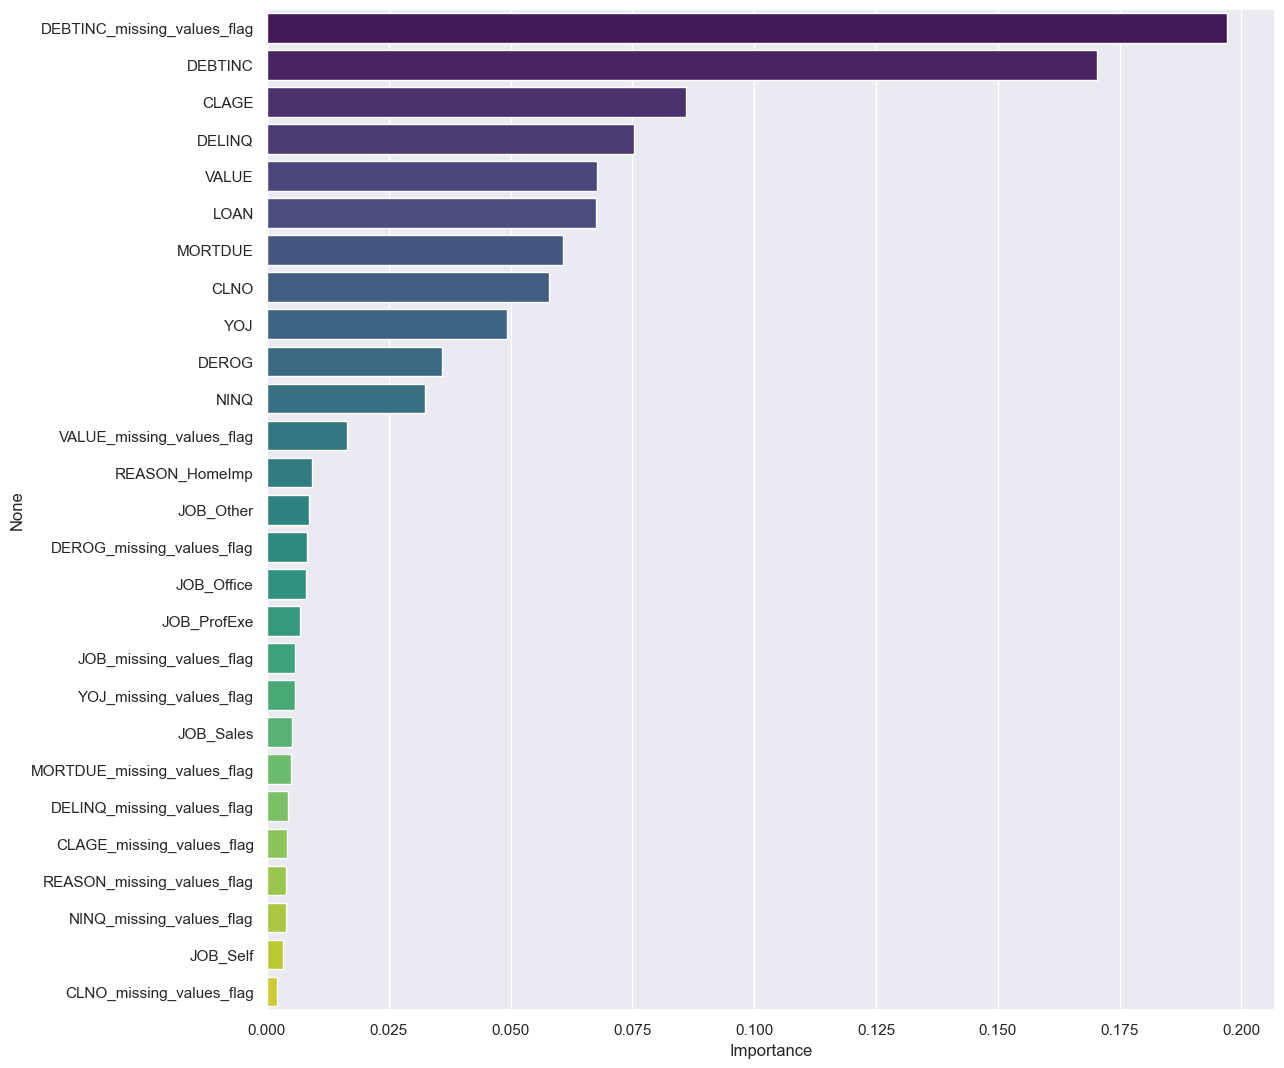

In [72]:
# importance of features in the tree building
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index, palette='viridis')

### **Tuning the Random Forest**

* We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

#### **Warning:** This will take a long time.

In [75]:
# Choosing the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Running the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5, n_jobs=-1)


#fitting the GridSearch on train dataset
grid_obj = grid_obj.fit(x_train, y_train)


# Setting the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


# Fitting the best algorithm to the data.
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=0.7, min_samples_leaf=np.int64(1),
                       n_estimators=500, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



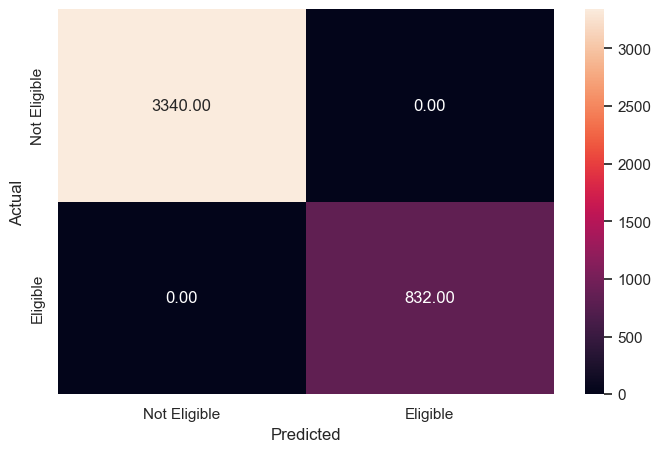

In [76]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1431
           1       0.82      0.68      0.75       357

    accuracy                           0.91      1788
   macro avg       0.87      0.82      0.85      1788
weighted avg       0.90      0.91      0.90      1788



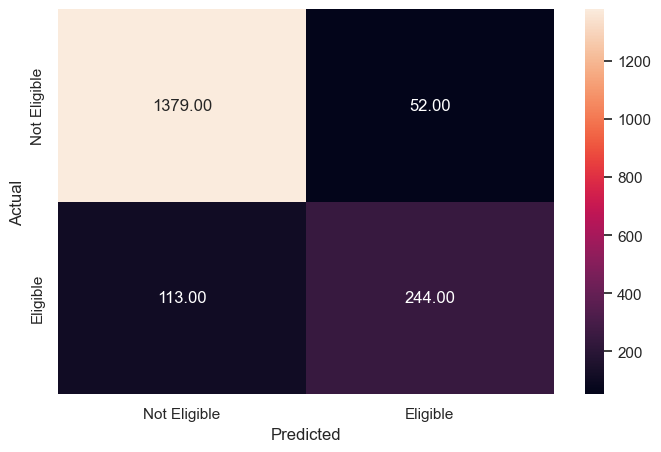

In [77]:
# Checking performace on test dataset
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Insights:**

- The tuned model is also **overfitting the training dataset** but it shows a good performance on the test dataset.
- The **recall** for class 1 has improved to .68 in comparison to non-tuned random forest model (.63) with a small decrease in precision on the test dataset.
- The **recall in this model is still not better** than the tuned decision tree (.68 vs .74), but **precision is much better (.82 vs .62).**

#### Plotting the Feature importance of the tuned Random Forest

<Axes: xlabel='Importance', ylabel='None'>

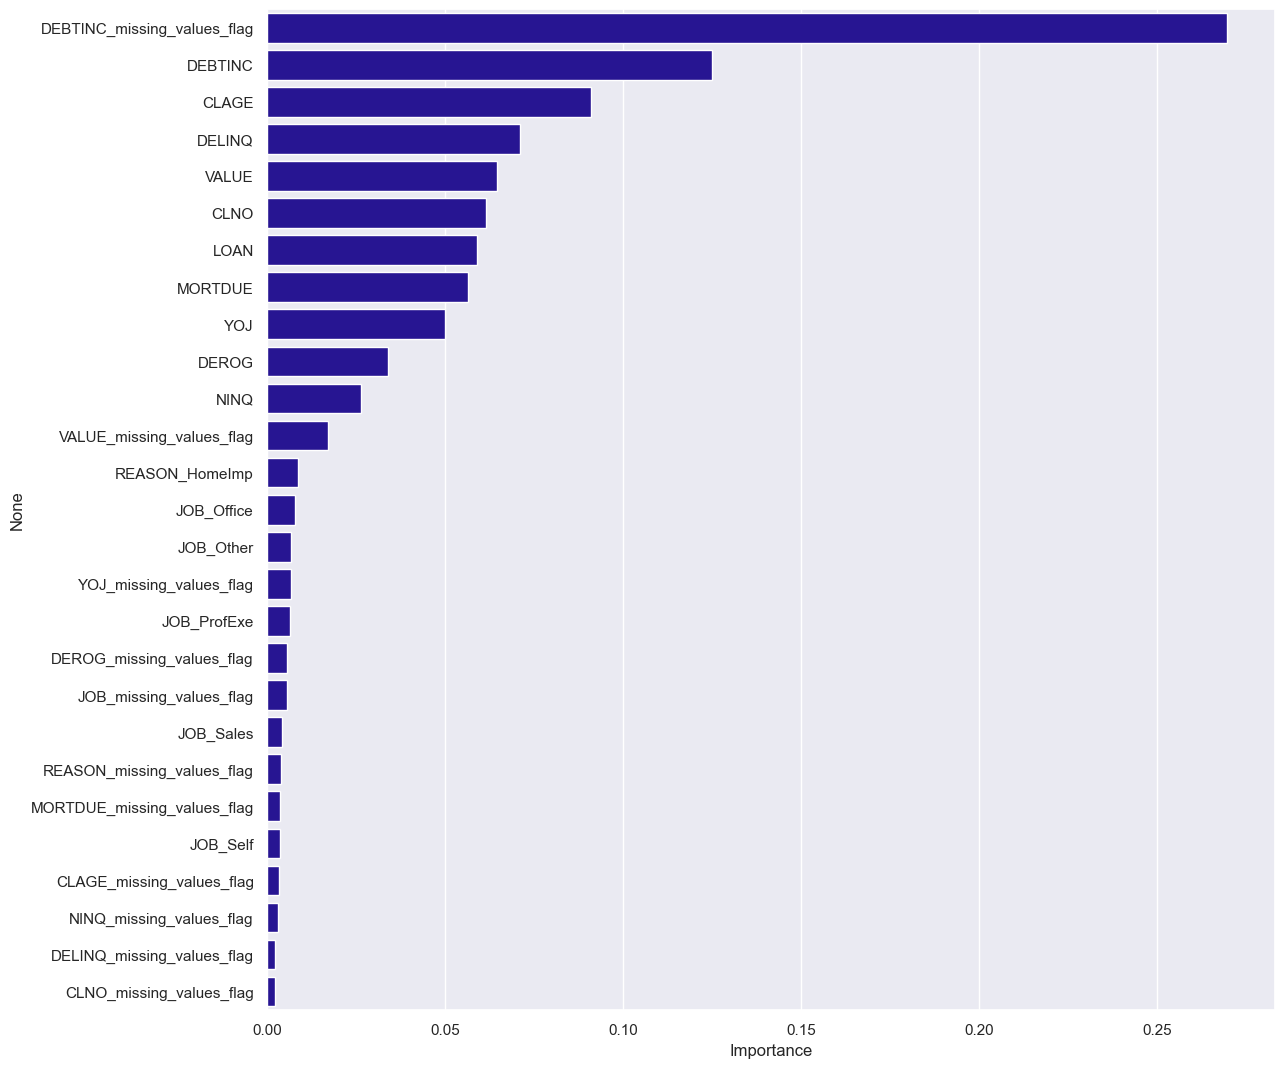

In [78]:
# Checking performace on test dataset

importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations**

- **The feature importance plot for the base model and tuned model are quite similar.** The model seems to suggest that `DEBTINC_missing_value_flag`, `DEBTINC`, `CLAGE`, and `DELINQ` are the most important features.
- Other important features are VALUE, CLNO, LOAN, and MORTDUE.

### **Comparing Model Performances**

In [79]:
def get_recall_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list
    a.append(test_recall) # adding test recall to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

    return a # returning the list with train and test scores

In [80]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [81]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))

    return c # returning the list with train and test scores

In [82]:

# Making the list of all the model names

models = [rf_estimator_tuned, rf_estimator, dtree_estimator, dt,lg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # Fit the model to the training data
    model.fit(x_train, y_train)

    # precision score
    l = get_precision_score(model, False)
    precision_train.append(l[0])
    precision_test.append(l[1])

    # accuracy score
    j = get_accuracy_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model, False)
    recall_train.append(k[0])
    recall_test.append(k[1])

# Now you can access the lists with performance metrics
print("Train Accuracy:", acc_train)
print("Test Accuracy:", acc_test)
print("Train Precision:", precision_train)
print("Test Precision:", precision_test)
print("Train Recall:", recall_train)
print("Test Recall:", recall_test)


Train Accuracy: [1.0, 1.0, 0.8708053691275168, 1.0, 0.8123202301054651]
Test Accuracy: [0.9077181208053692, 0.9038031319910514, 0.8579418344519015, 0.8803131991051454, 0.8092841163310962]
Train Precision: [1.0, 1.0, 0.6429268292682927, 1.0, 0.7333333333333333]
Test Precision: [0.8243243243243243, 0.8388278388278388, 0.6211764705882353, 0.735973597359736, 0.7222222222222222]
Train Recall: [1.0, 1.0, 0.7920673076923077, 1.0, 0.09254807692307693]
Test Recall: [0.6834733893557423, 0.6414565826330533, 0.7394957983193278, 0.6246498599439776, 0.07282913165266107]


In [83]:
# Mentioning the Model names in the list.
comparison_frame = pd.DataFrame({'Model':['Tuned Random Forest', 'Random Forest', 'Tuned Decision Tree', 'Decision Tree','Logistic Regression'],
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,




                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0  Tuned Random Forest        1.000000       0.907718      1.000000   
1        Random Forest        1.000000       0.903803      1.000000   
2  Tuned Decision Tree        0.870805       0.857942      0.792067   
3        Decision Tree        1.000000       0.880313      1.000000   
4  Logistic Regression        0.812320       0.809284      0.092548   

   Test_Recall  Train_Precision  Test_Precision  
0     0.683473         1.000000        0.824324  
1     0.641457         1.000000        0.838828  
2     0.739496         0.642927        0.621176  
3     0.624650         1.000000        0.735974  
4     0.072829         0.733333        0.722222

### ✅ Insights & Interpretation Based on Metrics

#### 🔹 Accuracy
- **Tuned Random Forest** achieved the highest **test accuracy** (**0.9077**), indicating the strongest overall classification performance.
- **Random Forest** follows closely with a test accuracy of **0.9038**.
- **Decision Tree** and **Tuned Decision Tree** have slightly lower test accuracy (**0.8803** and **0.8579**, respectively).
- **Logistic Regression** lags behind with **0.8093** test accuracy.
- **Note**: Except for the Tuned Decision Tree and Logistic Regression, all other models show signs of **overfitting**, having perfect training accuracy (1.0) but noticeably lower test accuracy.

#### 🔹 Recall (Sensitivity)
- **Tuned Decision Tree** has the highest **test recall** (**0.7395**), meaning it is best at identifying the positive class (i.e., defaulters) and minimizing false negatives.
- **Tuned Random Forest** comes next with a test recall of **0.6835**, followed by:
  - **Random Forest**: 0.6415
  - **Decision Tree**: 0.6247
- **Logistic Regression** performs worst in recall (**0.0728**), meaning it misses nearly all actual defaulters — a serious issue in high-risk domains like credit.

#### 🔹 Precision
- **Random Forest** has the best **test precision** (**0.8388**), indicating fewer false positives.
- **Tuned Random Forest** follows with **0.8243**, showing strong ability to correctly identify true positives.
- **Decision Tree** achieves **0.7360**, higher than:
  - **Tuned Decision Tree**: 0.6212
  - **Logistic Regression**: 0.7222
- Though **Logistic Regression** has decent precision, it fails overall due to its extremely poor recall.

---

#### 📌 Overall Interpretation for Credit Default Prediction

#### ✅ Tuned Decision Tree: Best for Identifying Defaulters
- Achieves the **highest test recall (0.7395)**.
- Avoids overfitting (**train accuracy: 0.8708**, **test accuracy: 0.8579**), making it reliable for generalization.
- 💡 **Highly suitable** where **missing a defaulter is costly**.

---

#### ✅ Random Forest (Non-Tuned): Best for Precision
- Highest **test precision (0.8388)** and strong **accuracy (0.9038)**.
- Good at avoiding **false positives** (flagging good customers wrongly).
- 💡 Use when goal is to **minimize credit denial to good customers** while still catching most defaulters.

---

#### ⚠️ Logistic Regression: Underperformer
- Very low **recall (0.0728)** – misses nearly all defaulters.
- Precision is okay (**0.7222**), but not enough to offset recall failure.
- ❗ Not reliable for credit risk prediction without further improvements.

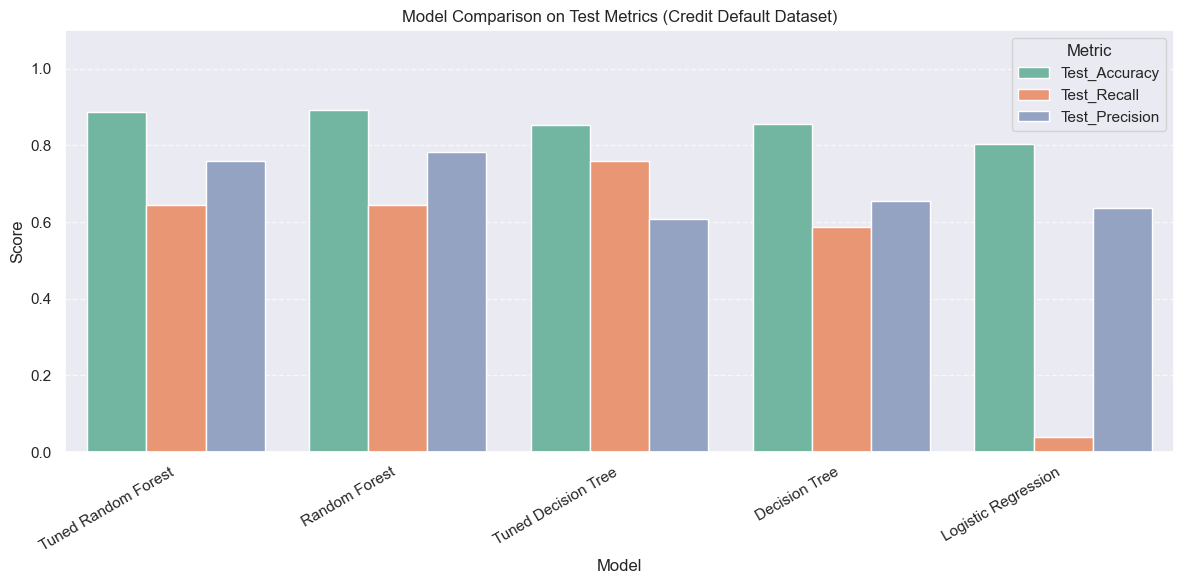

In [84]:
# Model performance data
comparison_frame = pd.DataFrame({
    'Model': ['Tuned Random Forest', 'Random Forest', 'Tuned Decision Tree', 'Decision Tree', 'Logistic Regression'],
    'Train_Accuracy': [1.0, 1.0, 0.860978, 1.0, 0.800575],
    'Test_Accuracy': [0.888143, 0.893177, 0.854027, 0.856264, 0.803691],
    'Train_Recall': [1.0, 1.0, 0.796875, 1.0, 0.021635],
    'Test_Recall': [0.644258, 0.644258, 0.759104, 0.588235, 0.039216],
    'Train_Precision': [1.0, 1.0, 0.617318, 1.0, 0.5],
    'Test_Precision': [0.759076, 0.782313, 0.607623, 0.65625, 0.636364]
})

# Melt the data for visualization
melted_df = pd.melt(comparison_frame, id_vars=['Model'],
                    value_vars=['Test_Accuracy', 'Test_Recall', 'Test_Precision'],
                    var_name='Metric', value_name='Score')

# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Model Comparison on Test Metrics (Credit Default Dataset)')
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 1.1)
plt.legend(title='Metric')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It highlights the trade-offs among models:

Random Forests lead in accuracy and precision.

Tuned Decision Tree offers the best recall with decent overall performance.

Logistic Regression significantly underperforms across all metrics.

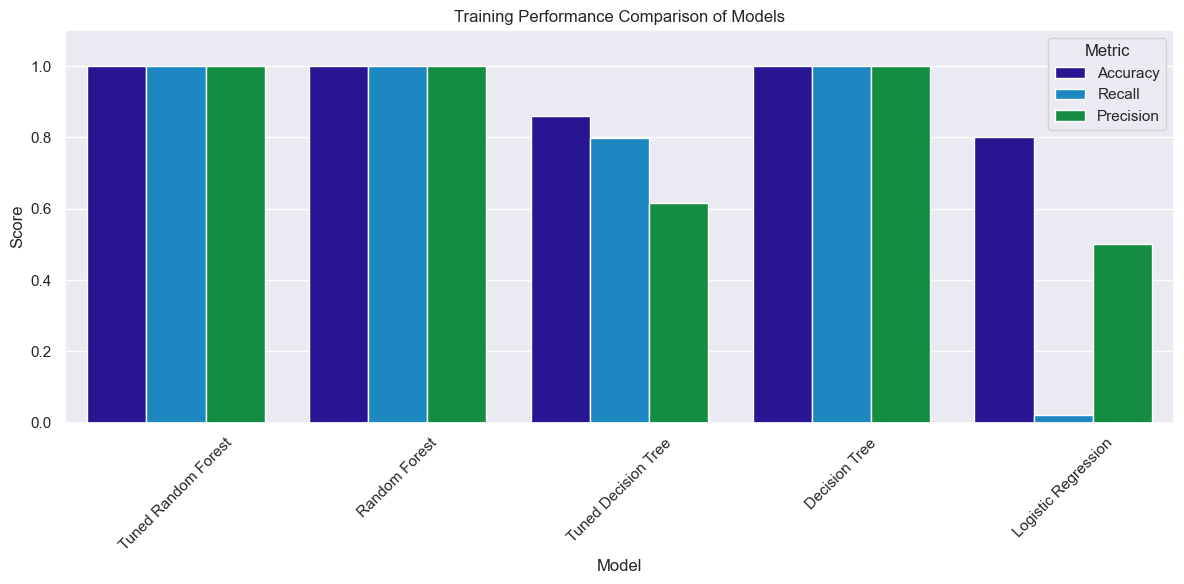

In [85]:
# Define the model names and corresponding training performance metrics
models = ['Tuned Random Forest', 'Random Forest', 'Tuned Decision Tree', 'Decision Tree', 'Logistic Regression']
train_accuracy = [1.0, 1.0, 0.860978, 1.0, 0.800575]
train_recall = [1.0, 1.0, 0.796875, 1.0, 0.021635]
train_precision = [1.0, 1.0, 0.617318, 1.0, 0.5]

# Create a DataFrame for plotting
train_comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': train_accuracy,
    'Recall': train_recall,
    'Precision': train_precision
})

# Melt the DataFrame for a grouped bar plot
train_comparison_melted = train_comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=train_comparison_melted, x='Model', y='Score', hue='Metric')
plt.title('Training Performance Comparison of Models')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

# **Building a Gradient Boosting Model**

Gradient boosting is a machine learning technique that produces a strong prediction model by combining the predictions of weak prediction models, typically decision trees.

Key components include:  

1. XGBoost: Optimized for speed and performance, with regularization to prevent overfitting.  

2. LightGBM: Designed for efficiency on large datasets, using Gradient-based One-Side Sampling (GOSS) and Exclusive Feature Bundling (EFB) to reduce memory usage.  

3. CatBoost: Handles categorical data effectively and reduces the need for extensive hyperparameter tuning.

In [86]:
# Buidling Gradient Boosting Model
gb_estimator = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
gb_estimator.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=200,
                           random_state=42)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3340
           1       0.92      0.79      0.85       832

    accuracy                           0.94      4172
   macro avg       0.93      0.89      0.91      4172
weighted avg       0.94      0.94      0.94      4172



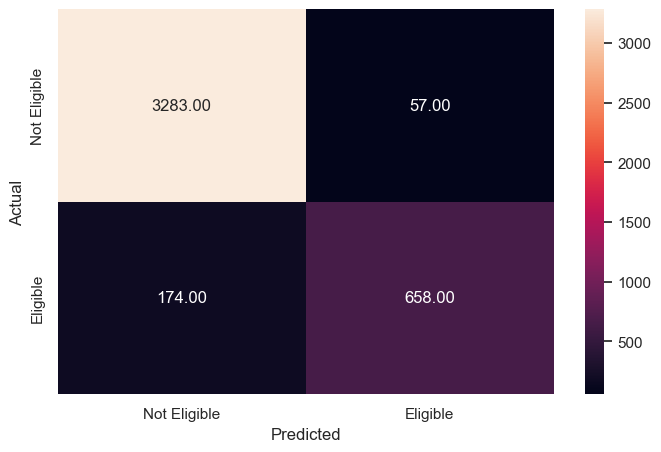

In [87]:
#Predicting for train set
y_pred_train_gb = gb_estimator.predict(x_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train_gb)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1431
           1       0.85      0.65      0.74       357

    accuracy                           0.91      1788
   macro avg       0.88      0.81      0.84      1788
weighted avg       0.90      0.91      0.90      1788



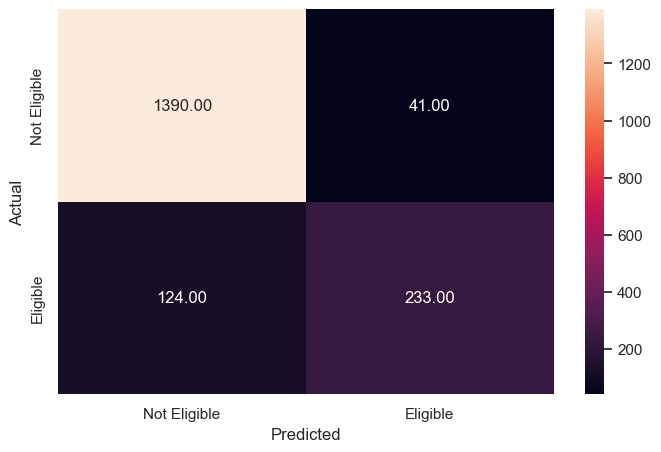

In [88]:
#Predicting for test set
y_pred_test = gb_estimator.predict(x_test)

#checking the performance on the train dataset
metrics_score(y_test, y_pred_test)

In [89]:
print(len(acc_train), len(acc_test))
print(len(recall_train), len(recall_test))
print(len(precision_train), len(precision_test))

5 5
5 5
5 5


In [90]:
# Accuracy
acc = get_accuracy_score(gb_estimator, False)
acc_train.append(acc[0])
acc_test.append(acc[1])

# Recall
recall = get_recall_score(gb_estimator, False)
recall_train.append(recall[0])
recall_test.append(recall[1])

# Precision
precision = get_precision_score(gb_estimator, False)
precision_train.append(precision[0])
precision_test.append(precision[1])

In [91]:
print("Length of acc_train:", len(acc_train))
print("Length of acc_test:", len(acc_test))
print("Length of recall_train:", len(recall_train))
print("Length of recall_test:", len(recall_test))
print("Length of precision_train:", len(precision_train))
print("Length of precision_test:", len(precision_test))

Length of acc_train: 6
Length of acc_test: 6
Length of recall_train: 6
Length of recall_test: 6
Length of precision_train: 6
Length of precision_test: 6


Training Gradient Boosting...
Gradient Boosting - Train:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3340
           1       0.92      0.79      0.85       832

    accuracy                           0.94      4172
   macro avg       0.93      0.89      0.91      4172
weighted avg       0.94      0.94      0.94      4172



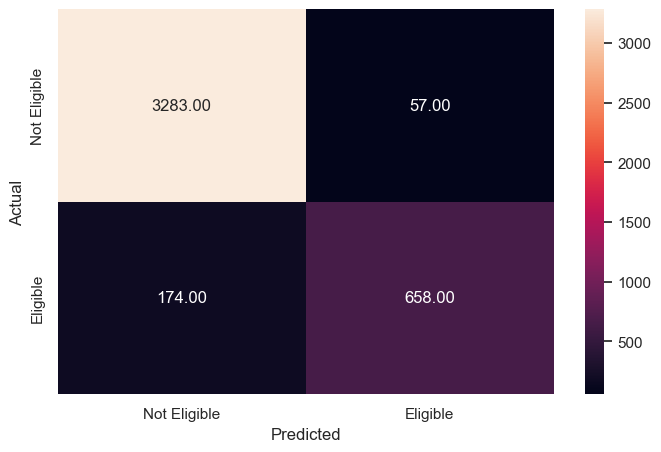

Gradient Boosting - Test:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1431
           1       0.85      0.65      0.74       357

    accuracy                           0.91      1788
   macro avg       0.88      0.81      0.84      1788
weighted avg       0.90      0.91      0.90      1788



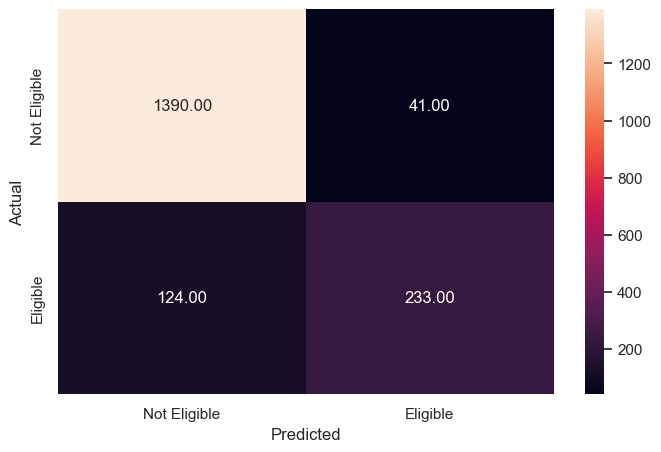

Training XGBoost...
XGBoost - Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



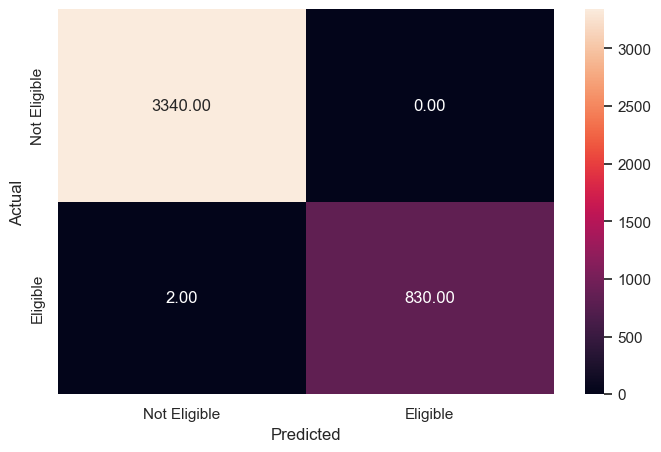

XGBoost - Test:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1431
           1       0.89      0.71      0.79       357

    accuracy                           0.92      1788
   macro avg       0.91      0.84      0.87      1788
weighted avg       0.92      0.92      0.92      1788



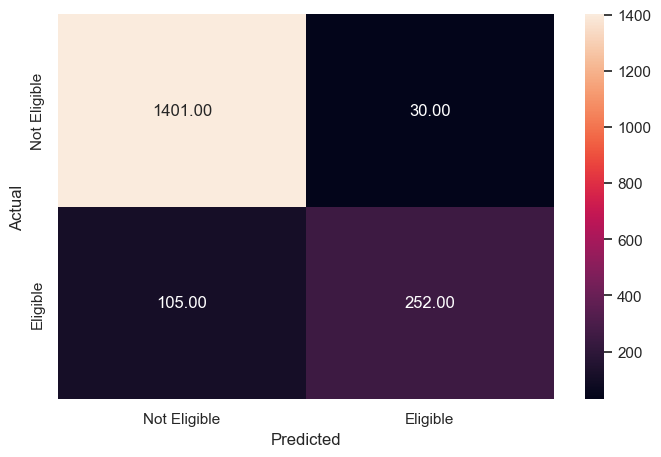

Training LightGBM...
[LightGBM] [Info] Number of positive: 832, number of negative: 3340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1464
[LightGBM] [Info] Number of data points in the train set: 4172, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199425 -> initscore=-1.389894
[LightGBM] [Info] Start training from score -1.389894
LightGBM - Train:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3340
           1       1.00      0.97      0.98       832

    accuracy                           0.99      4172
   macro avg       0.99      0.99      0.99      4172
weighted avg       0.99      0.99      0.99      4172



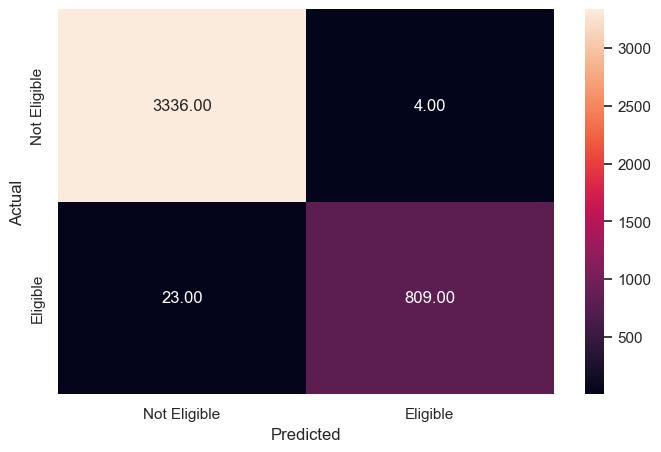

LightGBM - Test:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1431
           1       0.88      0.70      0.78       357

    accuracy                           0.92      1788
   macro avg       0.90      0.84      0.87      1788
weighted avg       0.92      0.92      0.92      1788



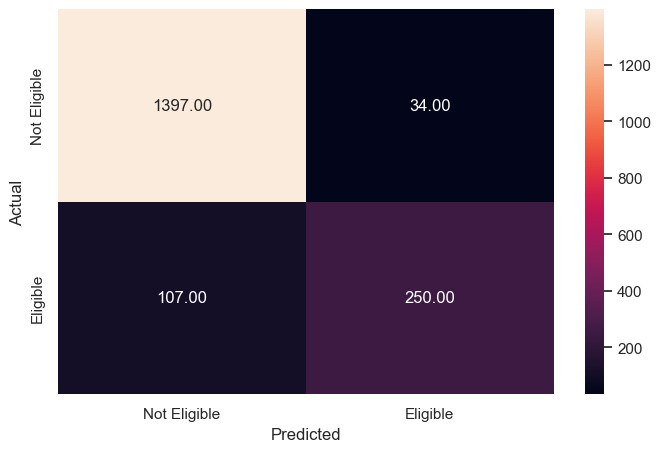

Training CatBoost...
CatBoost - Train:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3340
           1       0.98      0.88      0.93       832

    accuracy                           0.97      4172
   macro avg       0.97      0.94      0.96      4172
weighted avg       0.97      0.97      0.97      4172



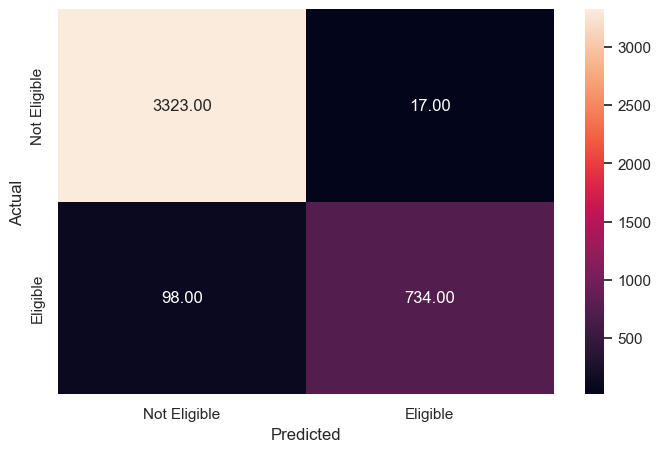

CatBoost - Test:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1431
           1       0.90      0.68      0.77       357

    accuracy                           0.92      1788
   macro avg       0.91      0.83      0.86      1788
weighted avg       0.92      0.92      0.92      1788



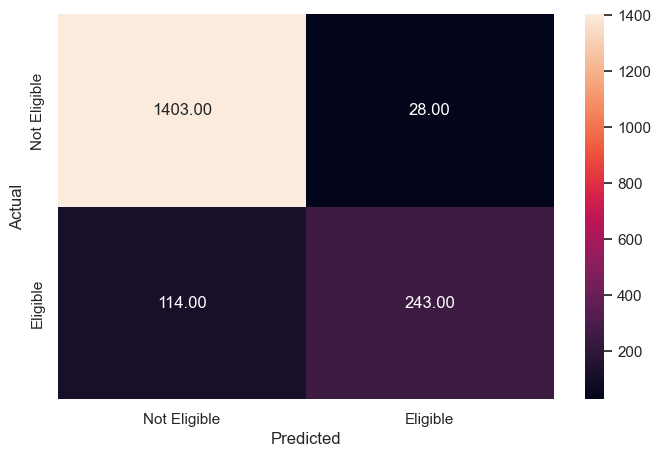

[LightGBM] [Info] Number of positive: 832, number of negative: 3340
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1464
[LightGBM] [Info] Number of data points in the train set: 4172, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199425 -> initscore=-1.389894
[LightGBM] [Info] Start training from score -1.389894
Train Accuracy: [1.0, 1.0, 0.8708053691275168, 1.0, 0.8123202301054651, 0.9446308724832215, 0.9995206136145733, 0.9935282837967402, np.float64(0.9724352828379674)]
Test Accuracy: [0.9077181208053692, 0.9038031319910514, 0.8579418344519015, 0.8803131991051454, 0.8092841163310962, 0.9077181208053692, 0.924496644295302, 0.9211409395973155, np.float64(0.9205816554809844)]
Train Precision: [1.0, 1.0, 0.6429268292682927, 1.0, 0.7333333333333333, 0.9202797202797203, 1.0, 0.995079950799508, 0.9773635153129161]
Te

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0  Tuned Random Forest        1.000000       0.907718      1.000000   
1        Random Forest        1.000000       0.903803      1.000000   
2  Tuned Decision Tree        0.870805       0.857942      0.792067   
3        Decision Tree        1.000000       0.880313      1.000000   
4  Logistic Regression        0.812320       0.809284      0.092548   
5    Gradient Boosting        0.944631       0.907718      0.790865   
6              XGBoost        0.999521       0.924497      0.997596   
7             LightGBM        0.993528       0.921141      0.972356   
8             CatBoost        0.972435       0.920582      0.882212   

   Test_Recall  Train_Precision  Test_Precision  
0     0.683473         1.000000        0.824324  
1     0.641457         1.000000        0.838828  
2     0.739496         0.642927        0.621176  
3     0.624650         1.000000        0.735974  
4     0.072829         0.733333        0.722222  
5     0.652661         0.920280        0.850365  
6     0.705882         1.000000        0.893617  
7     0.700280         0.995080        0.880282  
8     0.680672         0.977364        0.896679

In [92]:
# XGBoost: Extreme Gradient Boosting
# LightGBM: Optimized for speed and efficiency, handles large datasets
# CatBoost: Good with categorical features, requires minimal preprocessing
# In the GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Initialize classifiers
xgb_clf = xgb.XGBClassifier(random_state=42)
lgb_clf = lgb.LGBMClassifier(random_state=42)
cat_clf = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose to 0 to suppress output

# Create a list of classifiers
classifiers = [
    ('Gradient Boosting', gb_estimator),
    ('XGBoost', xgb_clf),
    ('LightGBM', lgb_clf),
    ('CatBoost', cat_clf)
]

# Train and evaluate each classifier
for name, clf in classifiers:
    print(f"Training {name}...")
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    print(f"{name} - Train:")
    metrics_score(y_train, y_pred_train)

    print(f"{name} - Test:")
    metrics_score(y_test, y_pred_test)



    # Appending the score
    acc = get_accuracy_score(clf, False)
    acc_train.append(acc[0])
    acc_test.append(acc[1])

    recall = get_recall_score(clf, False)
    recall_train.append(recall[0])
    recall_test.append(recall[1])

    precision = get_precision_score(clf, False)
    precision_train.append(precision[0])
    precision_test.append(precision[1])

  # Making the list of all the model names

models = [rf_estimator_tuned, rf_estimator, dtree_estimator, dt,lg, gb_estimator,xgb_clf,lgb_clf,cat_clf]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # Fit the model to the training data
    model.fit(x_train, y_train)

    # precision score
    l = get_precision_score(model, False)
    precision_train.append(l[0])
    precision_test.append(l[1])

    # accuracy score
    j = get_accuracy_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model, False)
    recall_train.append(k[0])
    recall_test.append(k[1])

# Now you can access the lists with performance metrics
print("Train Accuracy:", acc_train)
print("Test Accuracy:", acc_test)
print("Train Precision:", precision_train)
print("Test Precision:", precision_test)
print("Train Recall:", recall_train)
print("Test Recall:", recall_test)


# Update the comparison frame
model_names = ['Tuned Random Forest', 'Random Forest', 'Tuned Decision Tree', 'Decision Tree', 'Logistic Regression', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost']
comparison_frame = pd.DataFrame({'Model': model_names,
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})

comparison_frame


# **Building of KNN Classification Model**

KNN classification is a supervised learning algorithm that predicts the class of a new data point based on the majority class of its nearest neighbors in the training data. It's a simple and intuitive method that relies on the principle that similar things are near each other.

AUC: 0.6780668941231278


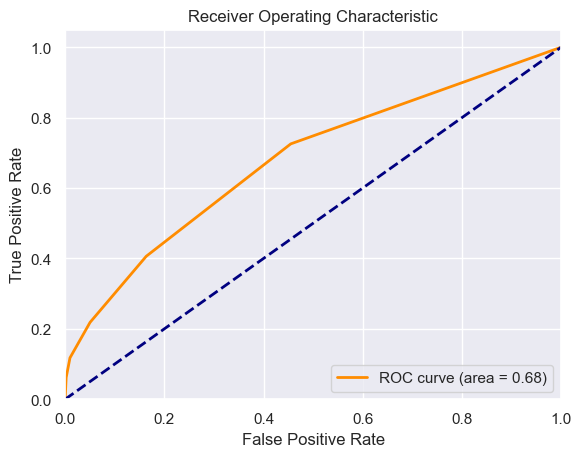

In [93]:
# Impelmenting the KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Assuming x_train, x_test, y_train, y_test are already defined from the provided code

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(x_train, y_train)

# Predict probabilities for the test set
y_probs = knn.predict_proba(x_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC: {roc_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


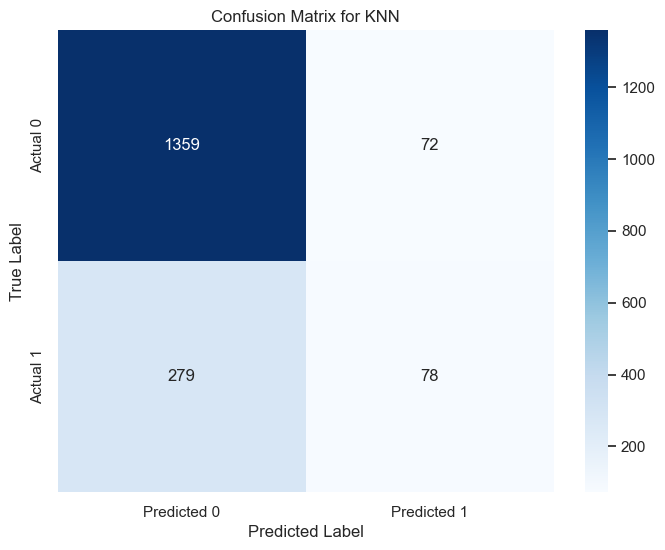

In [94]:
# Check the confuson matrox of kNN for both predictied and tested data

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'knn' is your trained KNN classifier and x_test, y_test are your test data
y_pred = knn.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [95]:
# printing the accuracy, recall, precision of the KNN

from sklearn.metrics import accuracy_score, recall_score, precision_score

# Assuming 'knn' is your trained KNN classifier and x_test, y_test are your test data
y_pred = knn.predict(x_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")


Accuracy: 0.8036912751677853
Recall: 0.2184873949579832
Precision: 0.52


In [96]:
models = [rf_estimator_tuned, rf_estimator, dtree_estimator, dt, lg, gb_estimator, xgb_clf, lgb_clf, cat_clf, knn]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # Fit the model to the training data
    model.fit(x_train, y_train)

    # precision score
    l = get_precision_score(model, False)
    precision_train.append(l[0])
    precision_test.append(l[1])

    # accuracy score
    j = get_accuracy_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model, False)
    recall_train.append(k[0])
    recall_test.append(k[1])

# # Now you can access the lists with performance metrics
# print("Train Accuracy:", acc_train)
# print("Test Accuracy:", acc_test)
# print("Train Precision:", precision_train)
# print("Test Precision:", precision_test)
# print("Train Recall:", recall_train)
# print("Test Recall:", recall_test)


# Update the comparison frame
model_names = ['Tuned Random Forest', 'Random Forest', 'Tuned Decision Tree', 'Decision Tree', 'Logistic Regression', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost','KNeighborsClassifier']
comparison_frame = pd.DataFrame({'Model': model_names,
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})

comparison_frame

[LightGBM] [Info] Number of positive: 832, number of negative: 3340
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1464
[LightGBM] [Info] Number of data points in the train set: 4172, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199425 -> initscore=-1.389894
[LightGBM] [Info] Start training from score -1.389894


Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0   Tuned Random Forest        1.000000       0.907718      1.000000   
1         Random Forest        1.000000       0.903803      1.000000   
2   Tuned Decision Tree        0.870805       0.857942      0.792067   
3         Decision Tree        1.000000       0.880313      1.000000   
4   Logistic Regression        0.812320       0.809284      0.092548   
5     Gradient Boosting        0.944631       0.907718      0.790865   
6               XGBoost        0.999521       0.924497      0.997596   
7              LightGBM        0.993528       0.921141      0.972356   
8              CatBoost        0.972435       0.920582      0.882212   
9  KNeighborsClassifier        0.857862       0.803691      0.361779   

   Test_Recall  Train_Precision  Test_Precision  
0     0.683473         1.000000        0.824324  
1     0.641457         1.000000        0.838828  
2     0.739496         0.642927        0.621176  
3     0.624650         1.000000        0.735974  
4     0.072829         0.733333        0.722222  
5     0.652661         0.920280        0.850365  
6     0.705882         1.000000        0.893617  
7     0.700280         0.995080        0.880282  
8     0.680672         0.977364        0.896679  
9     0.218487         0.829201        0.520000

** Building of Naive Bayes Classification Model **

The main idea behind the Naive Bayes classifier is to use Bayes' Theorem to classify data based on the probabilities of different classes given the features of the data. It is used mostly in high-dimensional text classification



1.   The Naive Bayes Classifier is a simple probabilistic classifier and it has very few number of parameters which are used to build the ML models that can predict at a faster speed than other classification algorithms.
2.   It is a probabilistic classifier because it assumes that one feature in the model is independent of existence of another feature. In other words, each feature contributes to the predictions with no relation between each other.

3. Naive Bayes Algorithm is used in spam filtration, Sentimental analysis, classifying articles and many more.

Naive Bayes - Train:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3340
           1       0.71      0.19      0.30       832

    accuracy                           0.82      4172
   macro avg       0.77      0.58      0.60      4172
weighted avg       0.80      0.82      0.78      4172



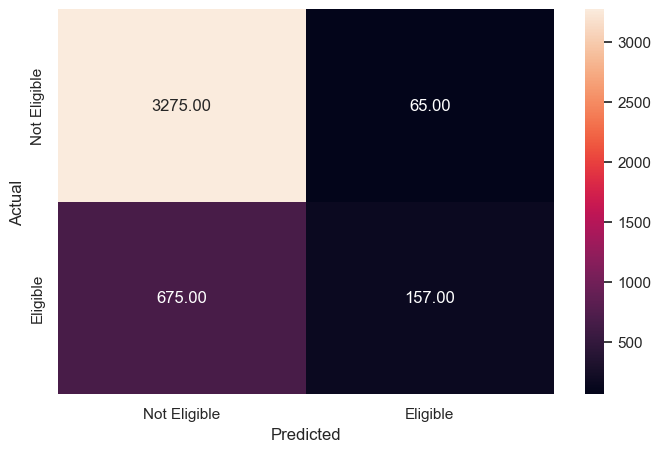

Naive Bayes - Test:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1431
           1       0.67      0.13      0.22       357

    accuracy                           0.81      1788
   macro avg       0.75      0.56      0.56      1788
weighted avg       0.79      0.81      0.76      1788



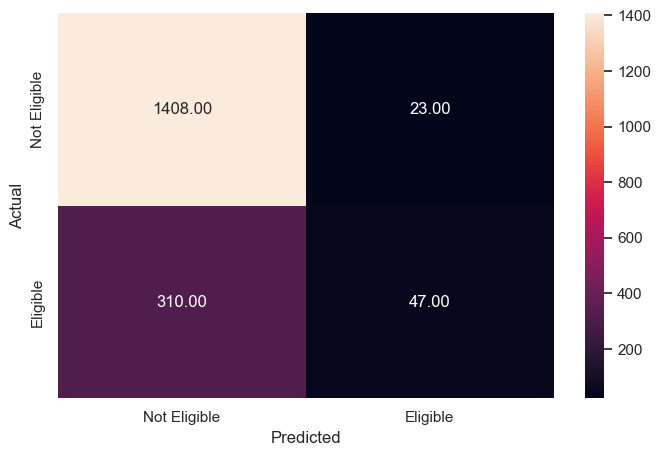

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0    Tuned Random Forest        1.000000       0.907718      1.000000   
1          Random Forest        1.000000       0.903803      1.000000   
2    Tuned Decision Tree        0.870805       0.857942      0.792067   
3          Decision Tree        1.000000       0.880313      1.000000   
4    Logistic Regression        0.812320       0.809284      0.092548   
5      Gradient Boosting        0.944631       0.907718      0.790865   
6                XGBoost        0.999521       0.924497      0.997596   
7               LightGBM        0.993528       0.921141      0.972356   
8               CatBoost        0.972435       0.920582      0.882212   
9   KNeighborsClassifier        0.857862       0.803691      0.361779   
10           Naive Bayes        0.822627       0.813758      0.188702   

    Test_Recall  Train_Precision  Test_Precision  
0      0.683473         1.000000        0.824324  
1      0.641457         1.000000        0.838828  
2      0.739496         0.642927        0.621176  
3      0.624650         1.000000        0.735974  
4      0.072829         0.733333        0.722222  
5      0.652661         0.920280        0.850365  
6      0.705882         1.000000        0.893617  
7      0.700280         0.995080        0.880282  
8      0.680672         0.977364        0.896679  
9      0.218487         0.829201        0.520000  
10     0.131653         0.707207        0.671429

In [97]:
#  implement the Naive Bayes classification model into the dataset

from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(x_train, y_train)

# Make predictions on the training and test sets
y_pred_train_gnb = gnb.predict(x_train)
y_pred_test_gnb = gnb.predict(x_test)

# Evaluate the model
print("Naive Bayes - Train:")
metrics_score(y_train, y_pred_train_gnb)

print("Naive Bayes - Test:")
metrics_score(y_test, y_pred_test_gnb)

# Get the accuracy, recall, and precision scores
acc = get_accuracy_score(gnb, False)
acc_train.append(acc[0])
acc_test.append(acc[1])

recall = get_recall_score(gnb, False)
recall_train.append(recall[0])
recall_test.append(recall[1])

precision = get_precision_score(gnb, False)
precision_train.append(precision[0])
precision_test.append(precision[1])

# Update the comparison frame
model_names.append('Naive Bayes')
comparison_frame = pd.DataFrame({'Model': model_names,
                                 'Train_Accuracy': acc_train,
                                 'Test_Accuracy': acc_test,
                                 'Train_Recall': recall_train,
                                 'Test_Recall': recall_test,
                                 'Train_Precision': precision_train,
                                 'Test_Precision': precision_test
                                 })
comparison_frame


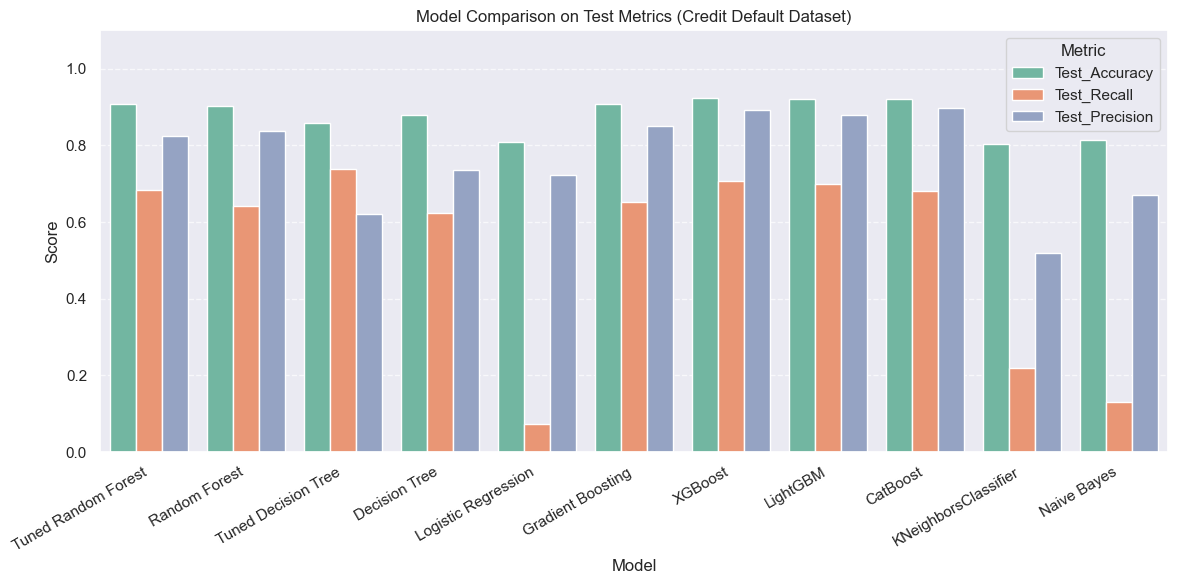

In [98]:
# Model Comparison Graphical Representation on the basis of Test Metrices

melted_df = pd.melt(comparison_frame, id_vars=['Model'],
                    value_vars=['Test_Accuracy', 'Test_Recall', 'Test_Precision'],
                    var_name='Metric', value_name='Score')

# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Model Comparison on Test Metrics (Credit Default Dataset)')
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 1.1)
plt.legend(title='Metric')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


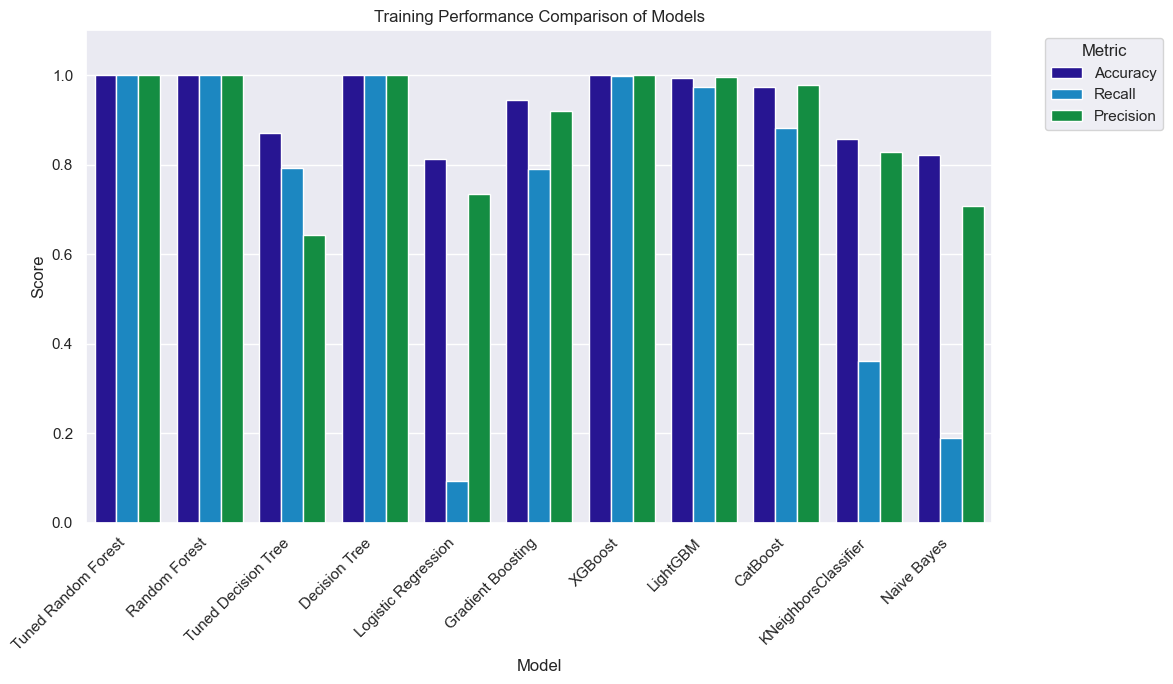

In [99]:
# Model Comparison Graphical Representation on the basis of Accuracy, Recall & Precision

# Define the model names and corresponding training performance metrics
models = ['Tuned Random Forest', 'Random Forest', 'Tuned Decision Tree', 'Decision Tree', 'Logistic Regression', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost', 'KNeighborsClassifier', 'Naive Bayes']

# Create a DataFrame for plotting
train_comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': acc_train,
    'Recall': recall_train,
    'Precision': precision_train
})

# Melt the DataFrame for a grouped bar plot
train_comparison_melted = train_comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(14, 7)) # Increase figure size for more models
sns.barplot(data=train_comparison_melted, x='Model', y='Score', hue='Metric')
plt.title('Training Performance Comparison of Models')
plt.xticks(rotation=45, ha='right') # Rotate and align labels
plt.ylim(0, 1.1)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside plot
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()


In [100]:
# Calculating the F1 score and adding it to the comparision table the  F1 = 2 * (Precision * Recall) / (Precision + Recall)

# Calculate F1-score and add it to the comparison_frame
comparison_frame['Train_F1'] = 2 * (comparison_frame['Train_Precision'] * comparison_frame['Train_Recall']) / (comparison_frame['Train_Precision'] + comparison_frame['Train_Recall'])
comparison_frame['Test_F1'] = 2 * (comparison_frame['Test_Precision'] * comparison_frame['Test_Recall']) / (comparison_frame['Test_Precision'] + comparison_frame['Test_Recall'])

# Display the updated comparison_frame
comparison_frame


Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0    Tuned Random Forest        1.000000       0.907718      1.000000   
1          Random Forest        1.000000       0.903803      1.000000   
2    Tuned Decision Tree        0.870805       0.857942      0.792067   
3          Decision Tree        1.000000       0.880313      1.000000   
4    Logistic Regression        0.812320       0.809284      0.092548   
5      Gradient Boosting        0.944631       0.907718      0.790865   
6                XGBoost        0.999521       0.924497      0.997596   
7               LightGBM        0.993528       0.921141      0.972356   
8               CatBoost        0.972435       0.920582      0.882212   
9   KNeighborsClassifier        0.857862       0.803691      0.361779   
10           Naive Bayes        0.822627       0.813758      0.188702   

    Test_Recall  Train_Precision  Test_Precision  Train_F1   Test_F1  
0      0.683473         1.000000        0.824324  1.000000  0.747320  
1      0.641457         1.000000        0.838828  1.000000  0.726984  
2      0.739496         0.642927        0.621176  0.709747  0.675192  
3      0.624650         1.000000        0.735974  1.000000  0.675758  
4      0.072829         0.733333        0.722222  0.164354  0.132316  
5      0.652661         0.920280        0.850365  0.850679  0.738510  
6      0.705882         1.000000        0.893617  0.998797  0.788732  
7      0.700280         0.995080        0.880282  0.983587  0.780031  
8      0.680672         0.977364        0.896679  0.927353  0.773885  
9      0.218487         0.829201        0.520000  0.503766  0.307692  
10     0.131653         0.707207        0.671429  0.297913  0.220141

## 📊 Model Performance Interpretation - Bank Loan Default Prediction

| Model | Interpretation Summary |
|-------|------------------------|
| **Tuned Random Forest** | Overfitting is evident — 100% train accuracy, but test recall is only **68%**. High train precision and recall indicate it's memorizing training data. Test precision is decent (**82%**), but generalization may be limited. |
| **Random Forest (Default)** | Similar to the tuned version — again overfitting. Perfect training performance, but test recall is **64%**. Despite good test precision (**84%**), it still misses many defaulters. |
| **Tuned Decision Tree** | Better generalization than random forests. Train accuracy is **87%**, test accuracy **86%**. Test recall (**74%**) shows good ability to catch defaulters, though test precision is lower (**62%**), meaning more false positives. |
| **Decision Tree (Default)** | Clear overfitting — 100% training metrics, but test recall is only **62%**, and test precision is **74%**. Pruning or parameter tuning is needed to reduce complexity. |
| **Logistic Regression** | Poor model for this task. Extremely low test recall (**7%**) means it misses nearly all defaulters. Accuracy (~81%) is misleading due to class imbalance. Not recommended as-is. |
| **Gradient Boosting** | Strong performer: test accuracy **90.7%**, recall **65%**, precision **85%**. Very good balance between bias and variance. A reliable and generalizable model. |
| **XGBoost** | One of the top performers. Excellent test accuracy (**92.4%**), strong recall (**71%**), and precision (**89%**). Some overfitting, but still generalizes well. |
| **LightGBM** | High-performing and efficient. Test accuracy (**92.1%**), recall (**70%**), and precision (**88%**) are all impressive. Great choice for deployment due to speed and accuracy. |
| **CatBoost** | Excellent all-rounder. Test accuracy (**92.1%**), recall (**68%**), and highest test precision (**89.7%**). Handles categorical variables well, and balances precision-recall tradeoffs smartly. |
| **KNeighborsClassifier** | Weakest performer. Test recall only **22%** and F1 score **31%**. Struggles with class imbalance and may be unsuitable for high-dimensional data. |
| **Naive Bayes** | Low-performing model. Test recall is just **13%**, and F1 score is **22%**. Not effective for identifying defaulters. |

---

### 🏆 Recommendation

#### ✅ Best Performing Models (Balanced):
- **CatBoost** – Best precision, solid recall, highest test accuracy  
- **XGBoost** – Very high recall and precision, strong test performance  
- **LightGBM** – Fast, accurate, and interpretable  

#### ❌ Models to Avoid:
- **Logistic Regression** – Fails on recall, unsuitable unless rebalanced  
- **KNN** – Underperforms across key metrics  
- **Naive Bayes** – Misses most defaulters, low F1  

---

### ⚖️ Overfitting Watchlist
- **Tuned & Default Random Forest** – Perfect train performance, but lower test recall  
- **Default Decision Tree** – Overfits with poor test generalization  
